# “Not backing it up!”: An enquiry into Liverpool’s poor defence of their 2019/20 English Premier League Crown”



# 0. Packages

In [40]:
#Import libraries

# libraries for data analysis, manipulation and visualisation:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from math import pi

# libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# housekeeping for visualizations
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

# supressing warnings
import warnings
warnings.filterwarnings("ignore")

In [41]:
# checking version of python used for this project
from platform import python_version
# get this version of python
print(python_version())

3.8.7


This project has been undertaken using, Python v. 3.8.7

# 1. Introduction

## 1.1. Project aim

As outlined in my DSM020 – project proposal (130365219, 2021), the overall aim of this project is to gain insights into Liverpool FC's worse-than-expected performance in the 2020/21 season by analysing English Premier League football association data obtained with regard to Liverpool. This project hopes to provide statistical and data-driven insights to solve this puzzle and explain the reasons behind Liverpool’s poor performance.

## 1.2. Background

As outlined in (130365219, 2021) the relationship between football and data science is blossoming. The honey-moon period post the world taking notice of Billy Beane’s reliance on sports analytics (or playing “Moneyball”) in (Lewis, 2011) has seen numerous publications concerning data science in football, with some of my favourites including (Kuper & Szymanski, 2012), (Anderson, 2013) and (Biermann, 2019). Mainstream media is now truly aware of the data revolution regarding football (Data experts are becoming football’s best signings, 2021). Evermore, analytics providers are stepping into the arena (e.g. Statsbomb, Analytics FC and Metrica Sports) and complimenting Opta Sports who have historically been the in sports analytics, particularly regarding football. To say nothing of its impact on the field, data science is impacting upon how fans consume and enjoy football. Football highlights programmes such as Match of the Day provide statistics that now include xG (a statistical representation of expected goals) once does not have to search too far to get other “x” paramerters e.g. xGA, xA etc. Data science is of course shaping the way the game is played. Liverpool hired (of all things) throw-in coach (Steenbach, 2020), and we are increasingly seeing players taking particular positions at corners and free-kicks etc. based on established probabilities of where the ball may end up rather than positioning based on intuition. I would suggest that data science is also causing a reduction in shooting from distance and an increase in players remaining playing in the holding-midfield position. Data science is also understood to be a key factor in the transfer market when targeting new recruits and players.

## 1.3. Motivation

(130365219, 2021) set out a clear motivation for this project. Liverpool won the 2019/20 Premier League with relative ease, earning their first title since 1990. Liverpool had come close to winning in prior years, with no season none more compelling than in the 2018/19 season where they lost out on the title to Manchester City by one point. The 97 points that Liverpool amassed in 2018/19 would have won 21 of the 22 prior Premier League seasons and consequently, that season, which included a 20-game unbeaten run and winning the last nine matches, was heralded as a success and a strong platform for winning the title in the subsequent 2019/20 season. Figure 1 below visualises Liverpool's Premier League history for the last 13 seasons with the three seasons in green representing the seasons that will be analysed in this project.

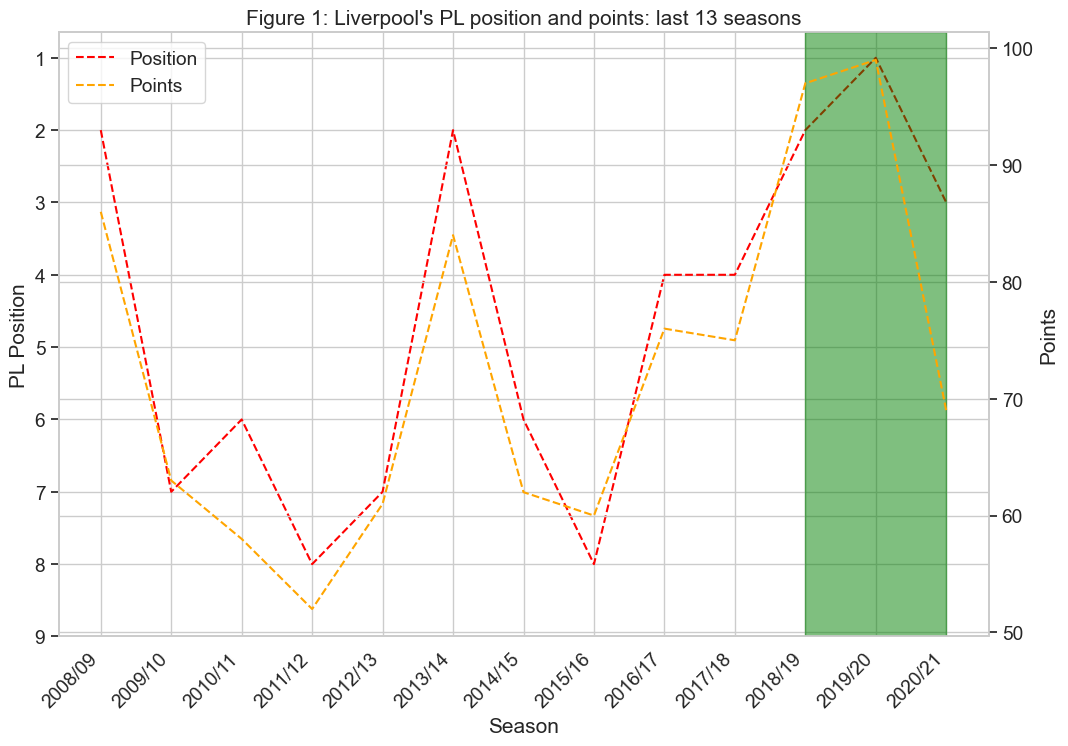

In [42]:
# Generating Figure 1: summary chart of Liverpool's PL position and points in last 13 seasons
seasons =['2008/09', '2009/10', '2010/11', '2011/12', '2012/13', '2013/14', '2014/15', '2015/16', '2016/17', '2017/18','2018/19','2019/20','2020/21']
positions = [2,7,6,8,7,2,6,8,4,4,2,1,3]
points = [86,63,58,52,61,84,62,60,76,75,97,99,69]
# this data was sourced from: https://www.premierleague.com/clubs/10/Liverpool/season-history
# this basic task did not involve web scraping, but creating / typing lists from viewing the web page given the few data points involved
liverpool_season_history_df = pd.DataFrame({'season':seasons,'position':positions,'points':points}) # creating a dataframe
# creating a vizualization and calling it
ax1 = plt.subplot()
l1, = ax1.plot(liverpool_season_history_df.position, color='red',linestyle = 'dashed')
ax1.set_yticks([i for i in range(1,10)])
ax1.invert_yaxis()
ax1.axes.set_xticks(np.arange(0,len(liverpool_season_history_df.season)))
ax1.set_xticklabels([season for season in liverpool_season_history_df.season],rotation = 45, ha = 'right')
ax1.axes.set_ylabel('PL Position')
ax1.axes.set_xlabel('Season')
ax2 = ax1.twinx()
l2, = ax2.plot(liverpool_season_history_df.points, color='orange',linestyle = 'dashed')
ax2.axes.set_ylabel('Points')
plt.legend([l1, l2], ["Position", "Points"])
plt.axvspan(10, 12, color='green', alpha=0.5)
plt.title("Figure 1: Liverpool's PL position and points: last 13 seasons")
plt.show()

Alas, Liverpool maintained their form from 2018/19 and won the 2019/20 Premier League in style, amassing 99 points via a 27-game unbeaten run and an 18-game winning run. One might argue that the effects of the COVID-19 pandemic deprived them of additional points – Liverpool won only five of their nine matches in the 2019/20 season when play returned subsequent to the suspension due to shelter-in-place requirements.

In the 2020/21 season however, and despite very little changing (e.g. no loss in manager or player), Liverpool failed to back-up their success of the prior seasons, finishing in third position with only 69 points. Many post-match analyses and column-inches were devoted to discussing Liverpool’s plight, with varying opinions expressed that explored a variety of reasons. The football community assigned blame to a number of actors, including injuries to key Liverpool players, loss of home crowds, poor performance of certain key players and a general lack of team desire for further victory. Others like Roy Keane in February 2021 accused the team of being ‘bad champions’ (Sky Sports Football, 2021). 

The purpose of this exercise however is to analyse Liverpool player, team and fixture data across the three seasons 2018/19, 2019/20 and 2020/21 to consider from analytical and statistical perspective the reasons why the team in 2020/21 did not perform to the standards set in the prior two seasons 2019/20 and 2018/19.

# 2. Data

The proposal (130365219, 2021) detailed the source of the data and how it was obtained (- in short, the use of  web spider for scraping involving the use of python packages selenium and BeautifulSoup) within all relevant legal and ethical considerations. The dataframes yielded are as follows:

1. team_stats_df
2. fixtures_final_df
3. player_detail_df 

As noted in (130365219, 2021), though it is slower, the use of selenium as opposed to requests to gather the data was required given the dynamic nature of the website hosting the data in that the website uses drop-down filters to select particular seasons and teams.

In summary, Liverpool team, fixture and player data was secured from www.premierleague.com for the Premier League seasons 2020/21, 2019/20 and 2018/19. This source was chosen given the legal and ethical requirements as well as this source being considered the absolute authority on Premier League statistics. On reflection, this dataset, while useful and rich, is not as exhaustive as other data sources that include other statistical measures that would have been useful for this project. Other statistical measures include data around “expected” performance statistics whether for a given player or team (such as xG (excpected goals scored over a period), xA (excpected assists over a period), xGA (excpected goals conceded over a period) etc.), as well as the timings of goals scored and conceded in a game or player touches in opponent box.

Additionally, as discussed in (130365219, 2021) there were a number of issues noted with the data that included:

- erroneous values (screenshots were provided in (130365219, 2021) of the datasource yielding erroneous values e.g. 39 fixtures per season but under Premier League rules all teams play 38 fixtures).
- certain players appearing in the team more than once.
- problems with player detail for players that were transferred or loaned in from or out to a Premier League team during the season (hence a list "transferred_players" was maintained to exclude such players from player analysis).
- player metrics were inconsistent as the majority of player metrics were position-focused and this demanded care and attention when considering metrics for player analysis.

The data sources were as follows:

- https://www.premierleague.com
- https://www.premierleague.com/clubs/10/Liverpool/season-history
- https://www.premierleague.com/clubs/10/Liverpool/stats 
- https://www.premierleague.com/players/ 
- https://www.premierleague.com/results
- https://www.premierleague.com/terms-and-conditions
    
*Please refer to (130365219, 2021) for detailed exploratory analysis undertaken on the data. All data maniputalation undertaken subsequent to that outlined in (130365219, 2021) is detailed in this project.*

In [43]:
# generating a list of players that transferred or went on loan to another Premier League team during a season
transferred_players = ['Lazar Markovic','Danny Ings','Nathaniel Clyne','Adam Lallana', 'Dominic Solanke', 'Harry Wilson','Danny Ings', 'Rhian Brewster','Ki-Jana Hoever']

In [44]:
# Taking a look at the data yielded in (130365219, 2021)

# initialising a list to store the three dataframes yielded in (130365219, 2021)
liv_df_list = []

# Reading in the data from csv files and removing the first column that relate to old indexes:
team_stats_df = pd.read_csv('team_stats_df.csv').drop(['Unnamed: 0'], axis = 1)
team_stats_df.df_name = 'team_stats_df' #give the dataframe a name for easier management going forward
liv_df_list.append(team_stats_df)

fixtures_final_df = pd.read_csv('fixtures_final_df.csv').drop(['Unnamed: 0'], axis = 1)
fixtures_final_df.df_name = 'fixtures_final_df' #give the dataframe a name for easier management going forward
liv_df_list.append(fixtures_final_df)

player_detail_df = pd.read_csv('player_detail_df.csv').drop(['Unnamed: 0'], axis = 1)
player_detail_df.df_name = 'player_detail_df' #give the dataframe a name for easier management going forward
liv_df_list.append(player_detail_df)

# Summary analysis on dataframes
for df in liv_df_list:
    print('Looking at .head()') # provides snapshot of first 5 rows of dataframe
    print(df.df_name,df.head())
    print('*'*50)
    print('Looking at .tail()') # provides snapshot of last 5 rows of dataframe
    print(df.df_name, df.tail())
    print('*'*50)

# further analysis on dataframes
for df in liv_df_list:
    print('Looking at .describe()') # provides summary statistics
    print(df.describe())
    print('*'*50)
    print('Looking at .info()') # provides information regarding dataframe (whether float, integer, bool or string) and also the number of non-null values
    print(df.info())
    print('*'*50)
    print('Looking at .shape') # provides dimensions of dataframe (rows x columns)
    print(df.shape)
    print('*'*50)
    print('Looking at .columns') # provides list of the columns of each dataframe
    print(df.columns)
    print('*'*50)

Looking at .head()
team_stats_df     season  Overall_Matches played  Overall_Wins  Overall_Draws  \
0  2020/21                      38            20              9   
1  2019/20                      38            32              3   
2  2018/19                      38            30              7   

   Overall_Losses  Overall_Goals  Overall_Goals Conceded  \
0               9             68                      42   
1               3             85                      33   
2               1             89                      22   

   Overall_Clean sheets  Attack_Goals  Attack_Goals per match  ...  \
0                    12            68                    1.79  ...   
1                    15            85                    2.24  ...   
2                    21            89                    2.28  ...   

   Defence_Interceptions  Defence_Clearances  Defence_Headed Clearance  \
0                    347                 544                       248   
1                    352    

       Overall_Appearances  Overall_Clean sheets  Overall_Wins  \
count           189.000000             28.000000    189.000000   
mean              9.444444              1.714286      6.301587   
std              13.404641              4.844677      9.729810   
min               0.000000              0.000000      0.000000   
25%               0.000000              0.000000      0.000000   
50%               0.000000              0.000000      0.000000   
75%              18.000000              0.000000     10.000000   
max              38.000000             21.000000     32.000000   

       Overall_Losses  Goalkeeping_Saves  Goalkeeping_Penalties Saved  \
count      189.000000          28.000000                    28.000000   
mean         1.518519           9.000000                     0.035714   
std          3.295052          23.084386                     0.188982   
min          0.000000           0.000000                     0.000000   
25%          0.000000           0.000000

# 3. Methodology

Having established the research question and gathered reliable and useful data, a suitable methodology can be proposed. In order to answer the research question, the project methodology will involve deployment of the following techniques and tools:

1. Summary tables with conditional formatting to emphasis comparably extreme values. These tables will illustrate variations in particular areas of focus over the past three seasons. Summary tables are presented in the body of the report and line graphs of Liverpool team statistics 2018/19 to 2020/21 are presented at Appendix 1.


2. Summary charts (including scatter graphs, countplots, stacked bar charts, spider charts) to again visualize variations in particular areas of focus of the past three seasons.

    While many graphs / visualizations are prepared "on the fly" with matplotlib, seaborn and pandas, radar charts are created via the below function "get_player_radarchart" which takes in a player statistics dataframe (player_detail_df, the name of a player and desired statistics). There is much debate over the use of radar charts due to scaling issues, however they have been prepared in such a way so that data is standardised and accordingly they appropriately depict the variations of individual player performance over the past three seasons.
    
    The radar chart is a chart that can also be prone to many errors and accordingly the function to create radar charts when passed the necessary arguments has been subject to significant error testing and error handling techniques, to account for issues that include:
    
    - incorrect spelling of a player 
    - incorrect spelling of a statistic
    - requesting invalid statistics
    - if a selected player for review did not play in all three seasons
    
    
3. While the presentation of tables, charts and summary statistics are each helpful to consider the research question, in order to focus the analysis, machine learning algorithms and tree based models will be deployed on Liverpool fixture data. The purpose of this is to ultimately glean the most important statistics that are associated with Liverpool wins and therefore provide a basis to further critically evaluate such statistics. A by-product of this work will be the production of a model that can predict whether or not Liverpool win a fixture based on fixture statistics.

    The following classifiers were trained to predict Liverpool match outcome 'Win' or 'not Win' as opposed to 'Win', 'Draw' or 'Loss' – The problem was simplified to be a two-category/binary classification for reasons that include the inequality in the distribution of results i.e. Liverpool won 72% of their fixtures in the three seasons. Match outcome was based on certain features (namely fixture statistics for Liverpool and Liverpool’s opponents) and the following classifiers from sklearn were deployed:

    -	Logistic Regression
    -	K Nearest Neighbors
    -	Decision Tree Classifier
    -	Random Forest
    -   Support Vector Machines

    (together, “list_of_classifiers”)
    
   The machine learning approaches involved defining the feature and target variables which relate to 23 selected fixture statistics (as they are considered to be relevant in determining football match outcome) and result (1 for Win, 0 for not). A heatmap was produced showing the Pearson correlation between the features (Figure 6) and and another that highlighted the top 10 features that correlate with the target (Figure 7). The fixture data into training and test data (80:20) with stratification undertaken given the imbalance in the target variables. We then pass the list of classifiers into the prepared function "fit_predict_classifiers" which is a pipeline that scales the data using sklearn's StandardScaler method and passes to each desired classifier to produce various reports / matrices (namely an accuracy score ranking, a confusion matrix and a classification report) that are useful in evaluating model usefulness.
    
    What is more beneficial for this exercise is focusing attention on the important features associated with Liverpool fixture outcome, which we can do with feature importance review with tree based models such as Random Forest Classifier, AdaBoost Classifier, Gradient Boosting Classifier (each from the sklearn package) and XG Boost Classifier (from the xgboost package). As these are tree based models there is no need to scale the data and we do not have to split the data between training and test sets. We pass the features and labels to the four classifiers and produce charts that set out the importance of each the features per each of the four models (Figures 8 to 11). 

In [45]:
# making the Liverpool match outcome a binary matter: adding the binary labels (Win or not Win)
fixtures_final_df['liv_win']  = fixtures_final_df.liv_result.map({'W':1,'D':0,'L':0})

In [46]:
# creating the function get_player_radarchart
def get_player_radarchart(player_detail_df, player, factors):
    
    # checking for Error 1 - is player name entered correctly?
    # a check is done to ensure the name is valid function ends if not
    if player_detail_df.name.str.contains(player).any() == False:
        print(f'{player} does not represent a valid entry. Please enter a correct player name.')
        return None
    temp_df = player_detail_df.loc[player_detail_df.name==player].dropna(axis = 1, how = 'all').groupby('season', as_index = False).sum()

    # checking for Error 2 - are all selected statistics valid statistics for this player?
    # a check is done to ensure the stats are valid and discarded if not
    revised_factors = []
    for factor in factors:
        if factor in temp_df.columns:
            revised_factors.append(factor)
    
    for factor in factors:
        if factor not in revised_factors:
            print(f'{factor} is not a valid statistic for this player and it has therefore been removed.')
            
    temp_df = temp_df[['season'] + revised_factors]
    
    # standardisation
    for factor in revised_factors:

        mean_val = temp_df[factor].mean()
        std_val = temp_df[factor].std()
        max_val = temp_df[factor].max()
        min_val = temp_df[factor].min()
        val_range = max_val - min_val
        temp_df[factor + '_Adj'] = temp_df[factor].apply(lambda x: ((x - mean_val) / val_range))

    dft = temp_df.loc[:, ['season']+ [factor+'_Adj' for factor in revised_factors]]

    
    #PART 1: Create background

    # number of variables
    categories=list(dft)[1:]
    N = len(categories)

    # Defining the angles
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # For first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)

    # remove grid labels
    ax.set_rgrids([])

    # PART 2: Add plots

    # Plot each individual season in a loop, not just on a season by season basis 
    #(if the latter an error will be raised if player did not play for three seasons)
    
    for i in range(dft.shape[0]):
        values=dft.loc[i].drop('season').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=dft.loc[i].season)
        ax.fill(angles, values, 'b',alpha=0.1)

    '''# 2018/19
    values=dft.loc[0].drop('season').values.flatten().tolist()
    print(values)
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=dft.loc[0].season)
    ax.fill(angles, values, 'b', alpha=0.1)

    # 2019/20
    values=dft.loc[1].drop('season').values.flatten().tolist()
    print(values)
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=dft.loc[1].season)
    ax.fill(angles, values, 'r', alpha=0.1)

   # 2020/21
    values=dft.loc[2].drop('season').values.flatten().tolist()
    print(values)
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=dft.loc[2].season)
    ax.fill(angles, values, 'r', alpha=0.05)'''

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # add title
    ax.set_title(f'{player} radar chart', y=1.1, fontsize = 16)
    
    return ax

# 4. Analysis and insights

**1. Liverpool's had a poor 2020/21 season compared to to the two prior seasons.**

Figure 1 above illustrated that Liverpool's 2020/21 point total and position worsened on the last two seasons, however we observe from this analysis that Liverpool's results were indeed poorer in 2020/21.

Figure 2 shows that Liverpool's win rate reduced significantly in 2020/21 (to 52% from 79% and 84% in the two prior seasons). Liverpool's home record is better than the away record (Figure 3), however their home record was poor in 2020/21 when compared with 2019/20 and 2018/19 (Figure 4) but their 2020/21 away record did not deteriorate to the same extent (Figure 5).

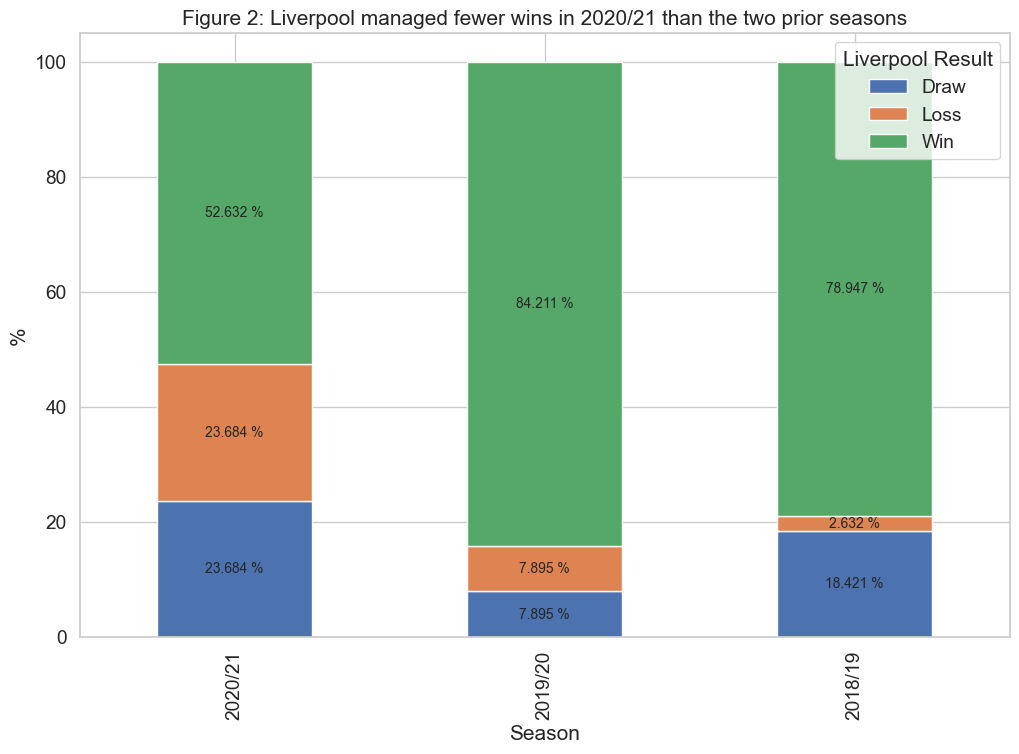

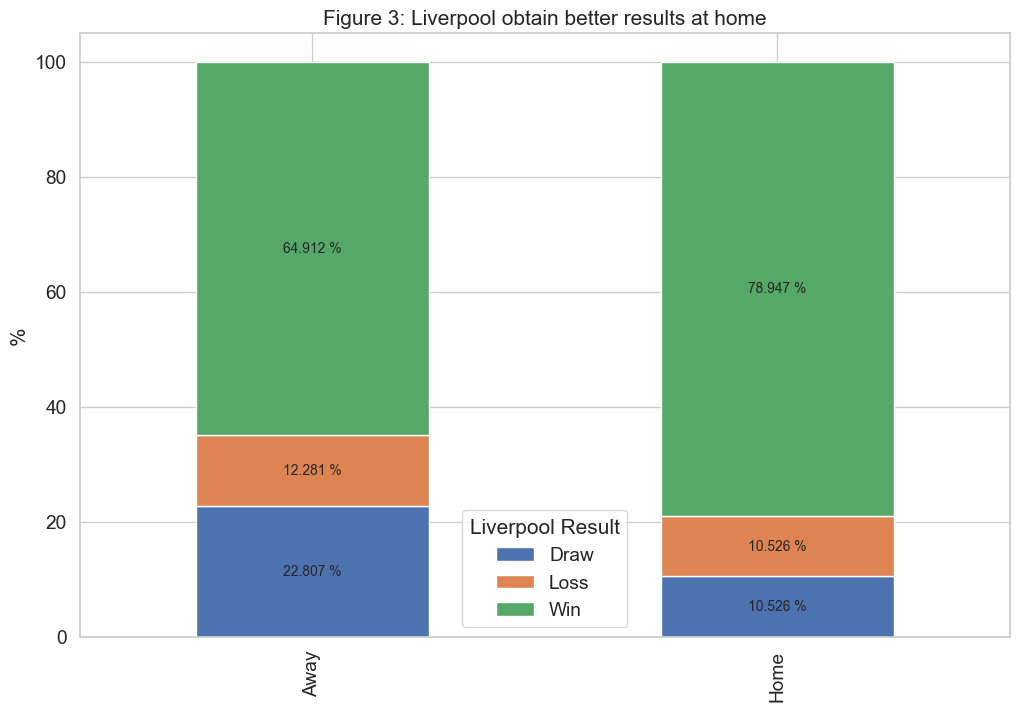

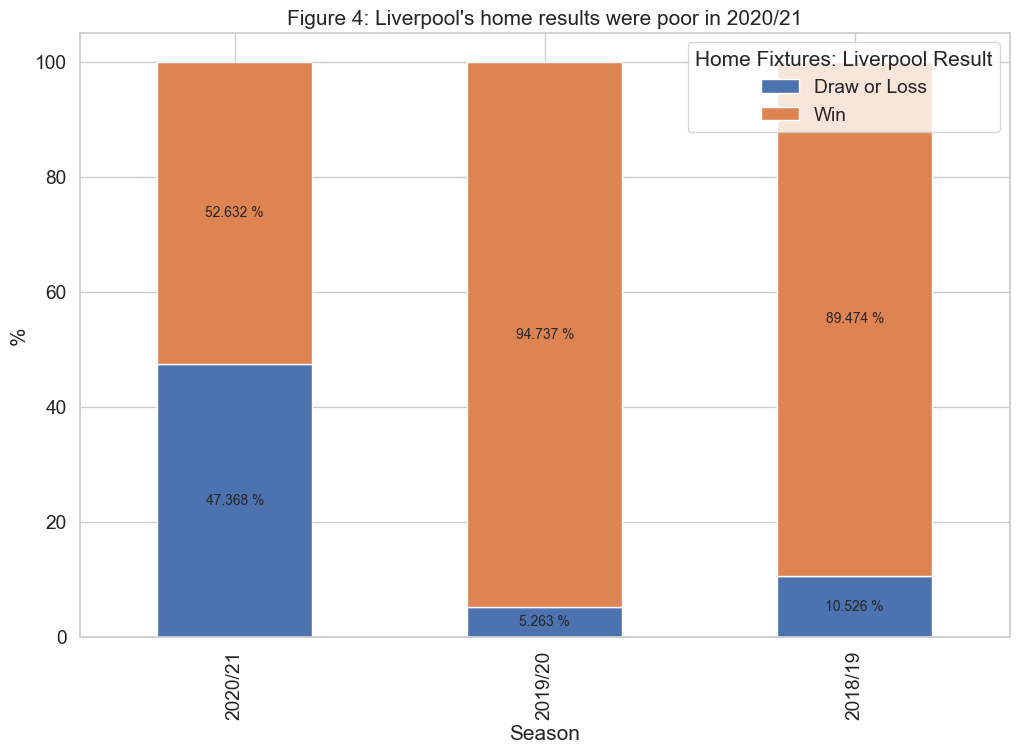

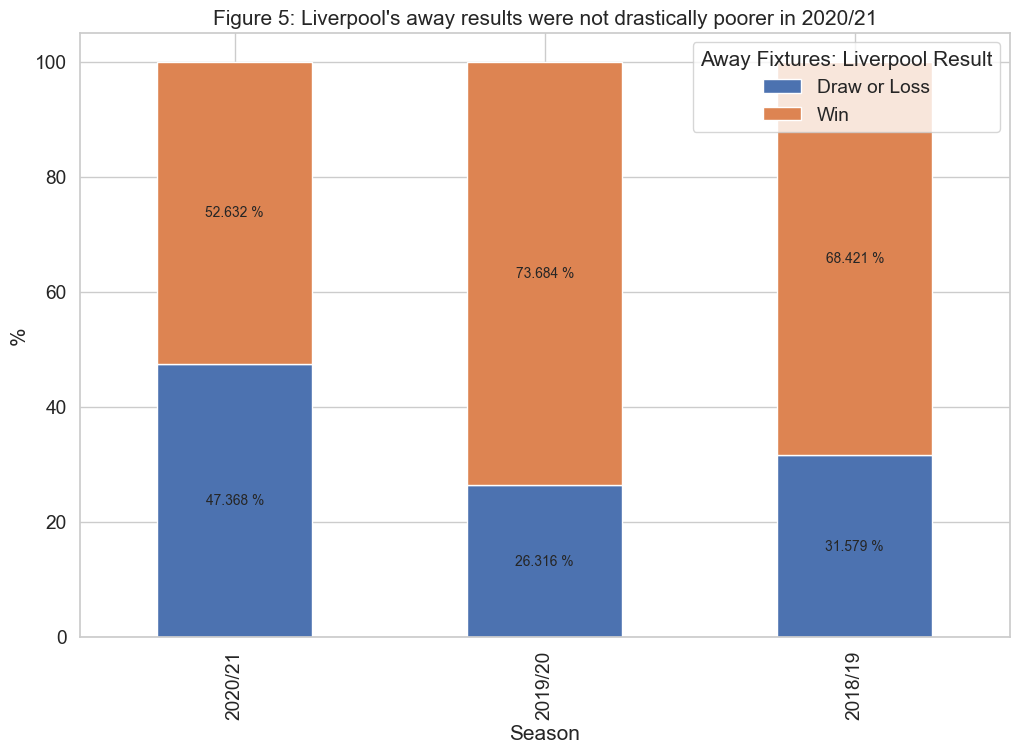

In [47]:
# Figure 2 - stacked barchart showing percentage of Liverpool fixtures that ended as Home win, Draw, or Away win across each season

counter = fixtures_final_df.groupby('season')['liv_result'].value_counts().unstack()
percentage_dist = 100 * counter.divide(counter.sum(axis = 1), axis = 0)
ax = percentage_dist.plot.bar(stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.3f} %'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
    ax.invert_xaxis()
plt.title('Figure 2: Liverpool managed fewer wins in 2020/21 than the two prior seasons')
plt.legend(["Draw", "Loss", "Win"]).set_title('Liverpool Result')
plt.xlabel('Season')
plt.ylabel('%')
plt.show()

# create a pie chart showing results by season # commented out as barchart considered a more helpful visualization
#summary_season_performance = team_stats_df[['season','Overall_Wins','Overall_Draws','Overall_Losses']]
#fig, axes = plt.subplots(2, 3, figsize=(15, 6))

#for i, (idx, row) in enumerate(summary_season_performance.set_index('season').iterrows()):
    #ax = axes[i // 3, i % 3]
    #row = row[row.gt(row.sum() * .01)]
    #ax.pie(row, labels=row.index,autopct='%1.1f%%', startangle=30)
    #ax.set_title(idx)
#plt.show()

# Figure 3 - Looking at Liverpool's home advantage
counter = fixtures_final_df.iloc[:,::-1].groupby('liv_home')['liv_result'].value_counts().unstack()
percentage_dist = 100 * counter.divide(counter.sum(axis = 1), axis = 0)
ax = percentage_dist.plot.bar(stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.3f} %'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
plt.title('Figure 3: Liverpool obtain better results at home')
plt.legend(["Draw", "Loss", "Win"]).set_title('Liverpool Result')
plt.ylabel('%')
plt.xlabel('')
plt.xticks(ticks = [1,0],labels=['Home','Away'])
plt.show()

# Figure 4 - Looking at Liverpool's poor home results in 2020/21
counter = fixtures_final_df[['season','liv_home','liv_win']].groupby(['liv_win','season']).sum().unstack()
counter = fixtures_final_df[fixtures_final_df.liv_home == 1]
counter = counter.groupby('season')['liv_win'].value_counts().unstack().sort_index(ascending=False)

percentage_dist = 100 * counter.divide(counter.sum(axis = 1), axis = 0)
ax = percentage_dist.plot.bar(stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.3f} %'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
plt.title("Figure 4: Liverpool's home results were poor in 2020/21")
plt.xlabel('Season')
plt.ylabel('%')
plt.legend(["Draw or Loss","Win"]).set_title('Home Fixtures: Liverpool Result')
plt.show()

# Figure 5 - Looking at Liverpool's away in 2020/21
counter = fixtures_final_df[['season','liv_home','liv_win']].groupby(['liv_win','season']).sum().unstack()
counter = fixtures_final_df[fixtures_final_df.liv_home == 0]
counter = counter.groupby('season')['liv_win'].value_counts().unstack().sort_index(ascending=False)

percentage_dist = 100 * counter.divide(counter.sum(axis = 1), axis = 0)
ax = percentage_dist.plot.bar(stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.3f} %'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
plt.title("Figure 5: Liverpool's away results were not drastically poorer in 2020/21")
plt.xlabel('Season')
plt.ylabel('%')
plt.legend(["Draw or Loss","Win"]).set_title('Away Fixtures: Liverpool Result')
plt.show()

**2. Liverpool's 2020/21 team and fixture statistics reflect poorer performance and the variations likely account for Liverpool's fewer wins in 2020/21**

To put competitions in association football succintly, successful teams score more goals than most and concede fewer than most. It is useful to therefore look at the statsitics underpinning goals scored and goals conceded.

-	Goals scored fell from 89 (2018/19) and 85 (2019/20) to 68 (2020/21), likely explainable by:

    o	Number of Shots on Target decreased from 226 (2018/19) and 231 (2019/20) to 214 (2020/21), despite number of Shots having increased to 608 (2020/21) from 591 (2019/20) and 575 (2018/19). 
    
    o	Shooting Accuracy decreased from 39% (2018/19) and 39% (2019/20) to 35% (2020/21) and it is not the case that the reduced shot accuracy was as a result of near-misses in the form of hitting the woodwork (Liverpool hit the woodwork 12 times in 2020/21, versus 17 times in 2019/20 and 19 times in 2018/19) or fewer big chances being created (Big chances created remained relatively consistent (78 (2018/19), 88 (2019/20) and 82 (2020/21))).
    

-	Goals conceded increased from 22 (2018/19) and 33 (2019/20) to 42 (2020/21) and Clean Sheets decreased from 21 (2018/19) and 15 (2019/20) to 12 (2020/21), likely explainable by:

    o	Number of goal-resulting defensive errors increasing from 4 (2018/19) and 5 (2019/20) to 11 (2020/21).

    o	Number of Tackles decreasing from 610 (2018/19) and 550 (2019/20) to 526 (2020/21) while tackle success % fell from 61 (2018/19) and 59 (2019/20) to 58% (2020/21).
    
    o	 Fewer clearances and duels won in 2020/21 when compared with the two prior seasons. 

In [48]:
# Looking at key Liverpool team statistics in tabular format
# please refer to Appendix 1 for charts demonstrating these variances
team_stats_df.groupby('season').sum().T.drop(['Attack_Goals per match', 'Defence_Goals conceded per match']).iloc[:,::-1].astype(int).style.background_gradient(axis=1).set_caption("Table of Liverpool Team Statistics 2018/19 to 2020/21")

Overall team statistical trends over the past three seasons have been discusssed above, but when we consider average fixture statistics it appears that Liverpool's change of play altered slightly 2020/21 and this may be attributable to the acquisition of Thiago Alcantara and playing midfield players in defence (e.g. Fabinho). 

To support this claim, we note that Liverpool were less rampant / dominant over their opponents - Liverpool on average had a net score per fixture of 0.68 goals in 2020/21, down from 1.76 (2018/19) and 1.37 (2019/20). This may be due to increased passing (average of 622 per fixture in 2018/19 and 628 in 2019/20 to 639 in 2020/21) and increased touches (average of 813 per fixture in 2018/19 and 815 in 2019/20 to 828 in 2020/21) without increased possession, shots on target, corners, opposition clearances and opponent tackles. In fact, average opposition touches and opponent passes increased in 2020/21 further suggesting that any new Liverpool style is aimless and causes the opposition to be more involved in the fixture. 

Obtaining positional data would be interesting to further investigate any new Liverpool playing style, but given this new style of play increased Liverpool's shots and also increased opponent touches and opponent shots on target it could be that this new style of play also saw Liverpool play in less of an attacking flow and further away from the opponent goal.

In [49]:
# Looking at average Liverpool fixture statistics in tabular format
fixtures_final_df.drop(labels = 'liv_home',axis =1).groupby('season').mean().T.iloc[:,::-1].style.background_gradient(axis = 1).set_caption("Table of Average Liverpool Fixture Statistics 2018/19 to 2020/21")

**3. Machine learning models note Liverpool shots on target metrics to be the most important feature affecting Liverpool fixture outcome.**

In summary, we have created a model that can predict with 79% accuracy whether Liverpool won a fixture or not when passed key match statistics. This represents a useful model and its accuracy and precision metrics are likely improvable with feature slection techniques and hyperparameter turning, but that is not undertaken here given that the research question is not to predict whether Liverpool won a match or not but to understand Liverpool's poor performance in 2020/21. Further work could be done on these models via hyperparameter tuning, decreasing features however improving this model is not the primary objective of this project. 

After passing the entire Liverpool fixture dataset to the four tree based algorithms to ascertain the most important features behind Liverpool fixture result, we note that the models are unanimous in noting that that Liverpool’s Shots on target metric is the most important aspect of Liverpool fixture outcome, with other key statistics varying per model. A surprising inclusion is that of Liverpool yellow cards which is likely due to Liverpool having picked up an additional two yellow cards in 2020/21 on the two prior seasons. Liverpool under the present manager have demonstrated themselves to be the most disciplined team in the Premier League for a number of years and the inclusion of yellow cards is an example of correlation not implying causation. 

This exercise has been most useful in that it is evident that Liverpool’s attack, given that they are primarily the players responsible for shooting, merits critical analysis. 

Our machine learning model to predict Liverpool fixtures is comprised of 23 statistics.


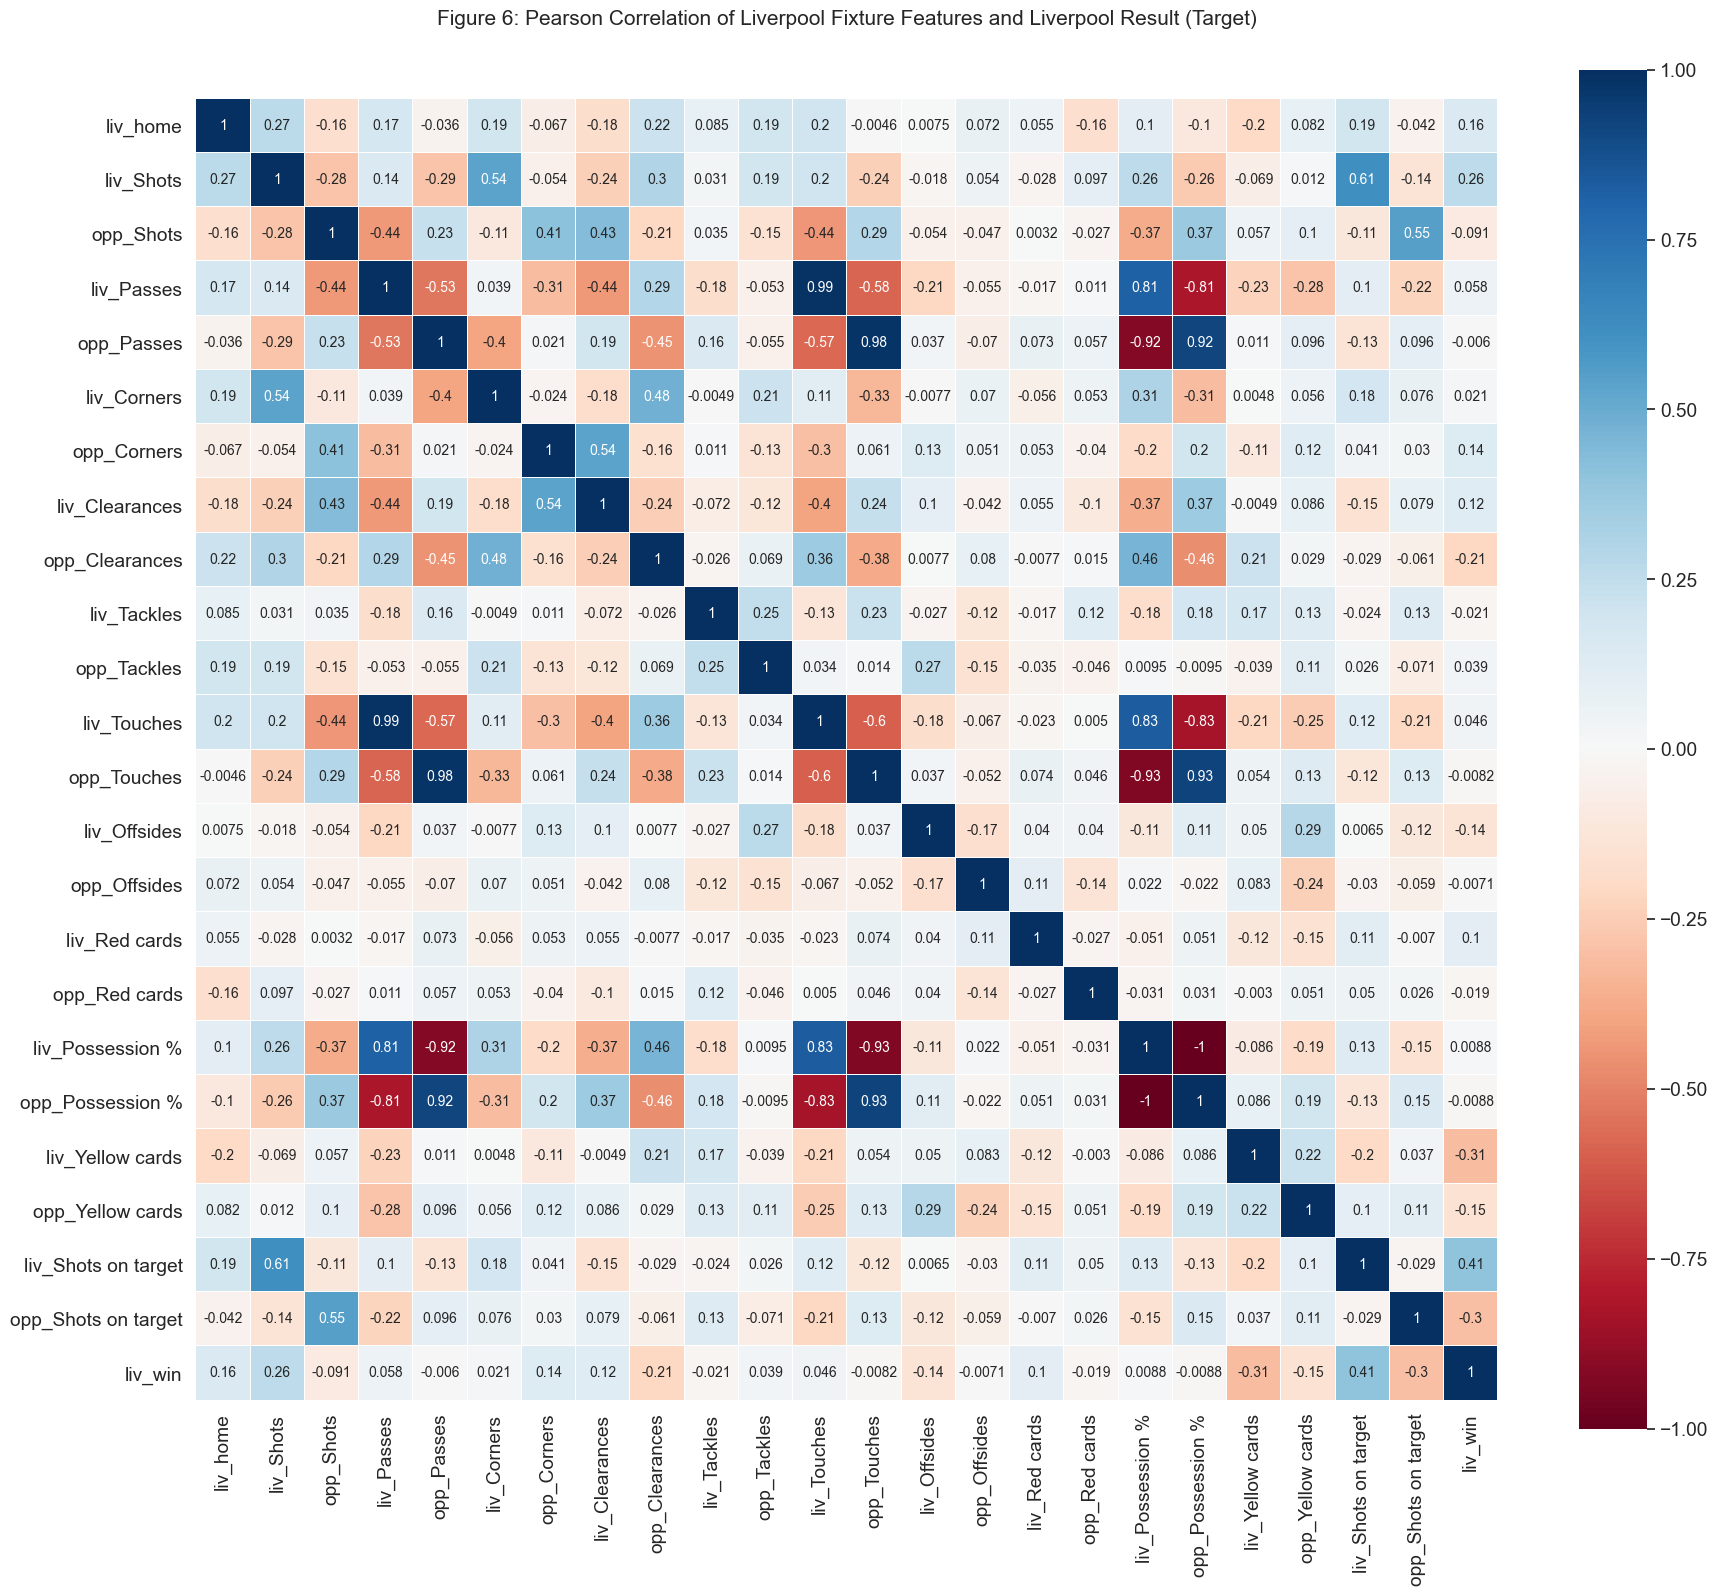

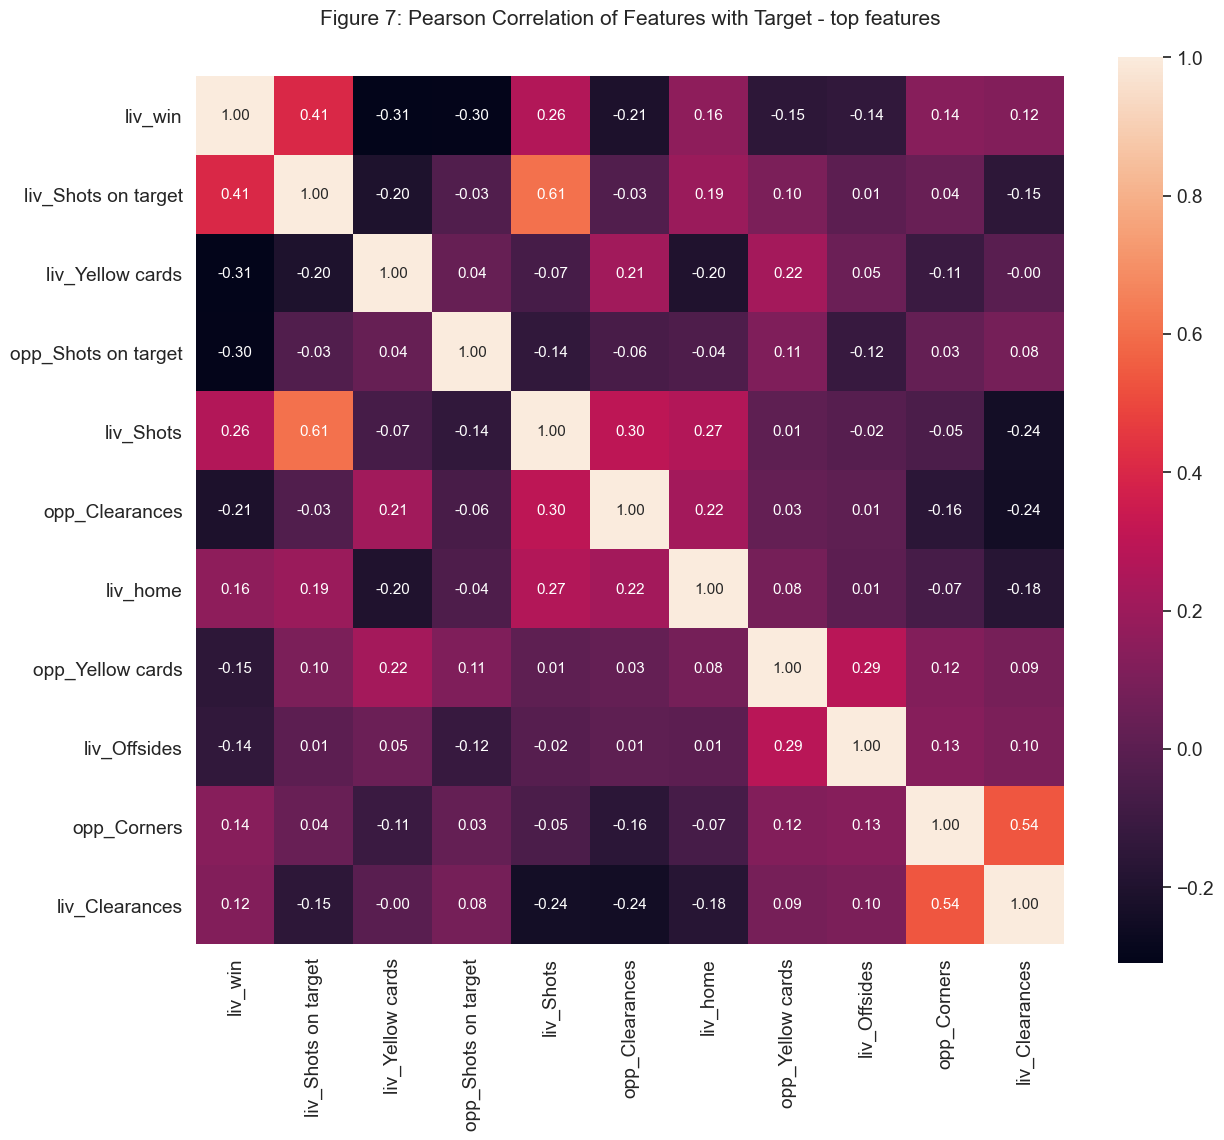

In [50]:
# Machine learning models on Liverpool fixtures

# initialising the list of desired classifiers
list_of_classifiers = [('Logistic Regression', LogisticRegression()), ('K Nearest Neighbours', KNeighborsClassifier()), ('Decision Tree Classifier', DecisionTreeClassifier()), ('Random Forest',  RandomForestClassifier()), ('SVC',SVC())]
# here we detail the feature columns for the machine learning classifiers
fixture_features = ['liv_home', 'liv_Shots', 'opp_Shots', 'liv_Passes', 'opp_Passes',
       'liv_Corners', 'opp_Corners', 'liv_Clearances', 'opp_Clearances',
       'liv_Tackles', 'opp_Tackles', 'liv_Touches', 'opp_Touches',
       'liv_Offsides', 'opp_Offsides', 'liv_Red cards', 'opp_Red cards',
       'liv_Possession %', 'opp_Possession %', 'liv_Yellow cards',
       'opp_Yellow cards', 'liv_Shots on target', 'opp_Shots on target']
print(f'Our machine learning model to predict Liverpool fixtures is comprised of {len(fixture_features)} statistics.')
# and the binary labels (Win or not Win)
fixtures_final_df['liv_win']  = fixtures_final_df.liv_result.map({'W':1,'D':0,'L':0})
fixture_labels = fixtures_final_df.liv_win

# Generating a heatmap showing the Pearson Correlation of Fixtures and Target
X_all = fixtures_final_df[fixture_features]
train_data=pd.concat([X_all,fixture_labels],axis=1)
colormap = plt.cm.RdBu
plt.figure(figsize=(21,18))
plt.title('Figure 6: Pearson Correlation of Liverpool Fixture Features and Liverpool Result (Target)', y=1.05, size=15)
sns.heatmap(train_data.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

# Generating a heatmap showing the Pearson Correlation of Fixtures and Target (top features)
plt.figure(figsize=(14,12))
plt.title('Figure 7: Pearson Correlation of Features with Target - top features', y=1.05, size=15)
k = 11 # number of variables for heatmap
cols = abs(train_data.astype(float).corr()).nlargest(k, 'liv_win')['liv_win'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# splitting the data into training and test data
X_train, X_test,y_train,y_test = train_test_split(X_all, fixture_labels, test_size=.8,stratify=fixture_labels, random_state= 1)

# creating a function that when passed a list of classifiers will fit training data each classifer and predict on the test data
# the function will also produce accuracy scores, and confusion matrix and classification reports for each classifier
def fit_predict_classifiers(classifiers):
    fit_predict_results_dict = {}
    # Iterate over the pre-defined list of classifiers
    for clf_name, clf in classifiers:
        # we scale the data with StandardScaler
        steps = [('scaler', StandardScaler()),
        (clf_name, clf)]
        pipeline = Pipeline(steps)
        # Fit the pipeline to the training set: scaled
        clf_scaled = pipeline.fit(X_train,y_train)

        # Predict y_pred
        y_pred = clf_scaled.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Evaluate clf's accuracy on the test set
        print("*" * 25)
        print(f"Overall performance of the {clf_name} classifier:")
        print('Accuracy: {:.2f}'.format(accuracy))
        fit_predict_results_dict[clf_name]=accuracy
        # obtain clf's confusion matrix
        print("Confusion matrix: \n",confusion_matrix(y_test, y_pred))

        # obtain clf's classification report
        print("Classification report: \n",classification_report(y_test, y_pred))
        print("*" * 25)
        fit_predict_results_df = pd.DataFrame.from_dict(fit_predict_results_dict,orient='index',columns=['Accuracy']).sort_values(by='Accuracy', ascending=False)
    return fit_predict_results_df

In [51]:
# calling the fit_predict_classifiers on the desired classifiers
liv_model_accs = fit_predict_classifiers(list_of_classifiers)
# and viewing the results in the form of accuracy scores, confusion matrices and and classification reports for each classifier,
# as well as a table raning the accuracy scores from the desired classifiers
liv_model_accs

*************************
Overall performance of the Logistic Regression classifier:
Accuracy: 0.79
Confusion matrix: 
 [[10 16]
 [ 3 63]]
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.38      0.51        26
           1       0.80      0.95      0.87        66

    accuracy                           0.79        92
   macro avg       0.78      0.67      0.69        92
weighted avg       0.79      0.79      0.77        92

*************************
*************************
Overall performance of the K Nearest Neighbours classifier:
Accuracy: 0.73
Confusion matrix: 
 [[ 1 25]
 [ 0 66]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.04      0.07        26
           1       0.73      1.00      0.84        66

    accuracy                           0.73        92
   macro avg       0.86      0.52      0.46        92
weighted avg       0.80      0.73      0.62   

Accuracy
Logistic Regression       0.793478
K Nearest Neighbours      0.728261
Decision Tree Classifier  0.728261
Random Forest             0.728261
SVC                       0.717391

[13:23:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


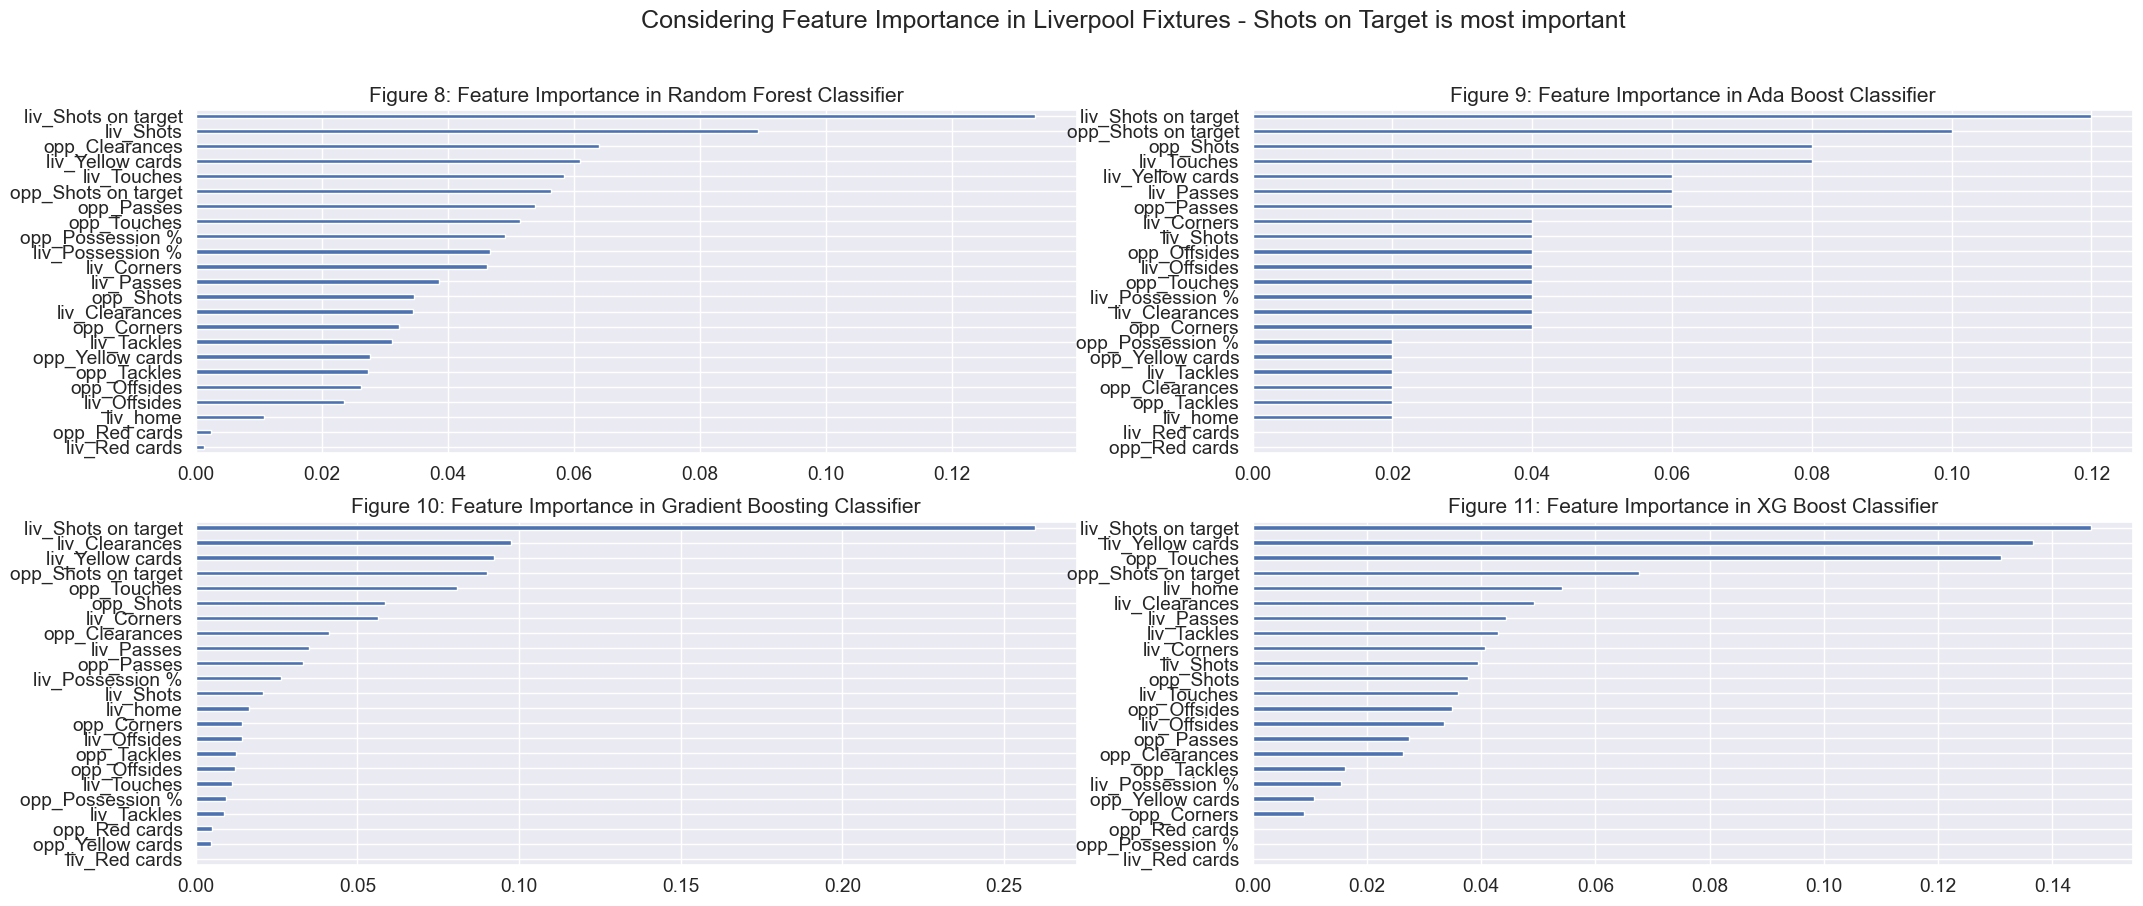

In [52]:
# Feature Importance Evaluation With 4 x Tree Based Models

f, ax = plt.subplots(2,2, figsize = (25,10))

model1 = RandomForestClassifier()
model1.fit(X_all, fixture_labels)
pd.Series(model1.feature_importances_,X_all.columns).sort_values(ascending = True).plot.barh(width = .3,ax=ax[0,0])
ax[0,0].set_title('Figure 8: Feature Importance in Random Forest Classifier')

model2 = AdaBoostClassifier()
model2.fit(X_all, fixture_labels)
pd.Series(model2.feature_importances_,X_all.columns).sort_values(ascending = True).plot.barh(width = .3,ax=ax[0,1])
ax[0,1].set_title('Figure 9: Feature Importance in Ada Boost Classifier')

model3 = GradientBoostingClassifier()
model3.fit(X_all, fixture_labels)
pd.Series(model3.feature_importances_,X_all.columns).sort_values(ascending = True).plot.barh(width = .3,ax=ax[1,0])
ax[1,0].set_title('Figure 10: Feature Importance in Gradient Boosting Classifier')

model4 = XGBClassifier()
model4.fit(X_all,fixture_labels)
pd.Series(model4.feature_importances_,X_all.columns).sort_values(ascending = True).plot.barh(width = .3,ax=ax[1,1])
ax[1,1].set_title('Figure 11: Feature Importance in XG Boost Classifier')

plt.suptitle('Considering Feature Importance in Liverpool Fixtures - Shots on Target is most important')

plt.show()

**4. Attack**

Given that the tree-based classifiers highlighted the importance of Liverpool’s attack and this is supported by the team statistics, Attack was subject to critical evaluation. Arguably, the hypothesis that Liverpool's attack was a key reason for poor 2020/21 performance goes against standard opinion with regard to Liverpool’s 2020/21 performance as many commentators attributed Liverpool’s plight to defensive issues rather than attacking ones.

Liverpool’s most appearing, and therefore important, forwards are Mohamed Salah, Roberto Firmino and Sadio Mané, with each having played 108, 108 and 106 respectively of the 114 total Premier League fixtures of the last three seasons. The next closest is Divock Origi who has only played 49 fixtures. The limitation of the data however does not reflect that this player’s appearances have primarily been as a substitute. Takumi Minamino's 2020/21 statistics are skewed due to him playing 10 of his 19 2020/21 Premier League appearances on loan at Southamption. This is another weakness in the data.

As Figure 13 illustrates, Liverpool are heavily reliant on their front three for goals (scoring at least 47% of their goals each season for the last three seasons). Consequently, when Liverpool's front three fail to fire it is likely that the team will fail to score and therefore will have difficulty in winning games. 

It is important to evaluate shot accuracy given the relevance of shot accuracy noted from the feature importance work. In Figure 20, Liverpool management will want their players to group toward the top right of each chart, as this indicates more shot accuracy and goals. In 2020/21, Figure 20 shows each player in the bottom half of the chart and only Mohamed Salah is to the right of the chart. Accordingly, it is clear that these three key forwards compared poorly in 2020/21 compared with the two seasons prior, in particular Sadio Mane whose goals reduced from 22 and 18 to 11 and whose accuracy reduced from 48% and 47% to 38%. 

Liverpool strengthened with the acquisition of Diogo Jota at the beginning of the 2020/21 season and despite only being part of 19 games, he compared similarly to Firmino and Mane in terms of goals scored (Figure 20). Jota’s metrics in 2020/21 are encouraging for future seasons. 

Figure 17 shows the number of shots taken by each of the Big-3 forwards each season. Mohamed Salah’s general reduction is noteworthy – viewers of Liverpool matches will have observed some on the field tension during the 2019/20 season between Sadio Mane and Mohamed Salah with regard to Mane’s suggestion that Salah is prone to shooting rather than passing to him. Perhaps the tension is a reason behind Salah’s reduced numbers and Mane’s increased. 

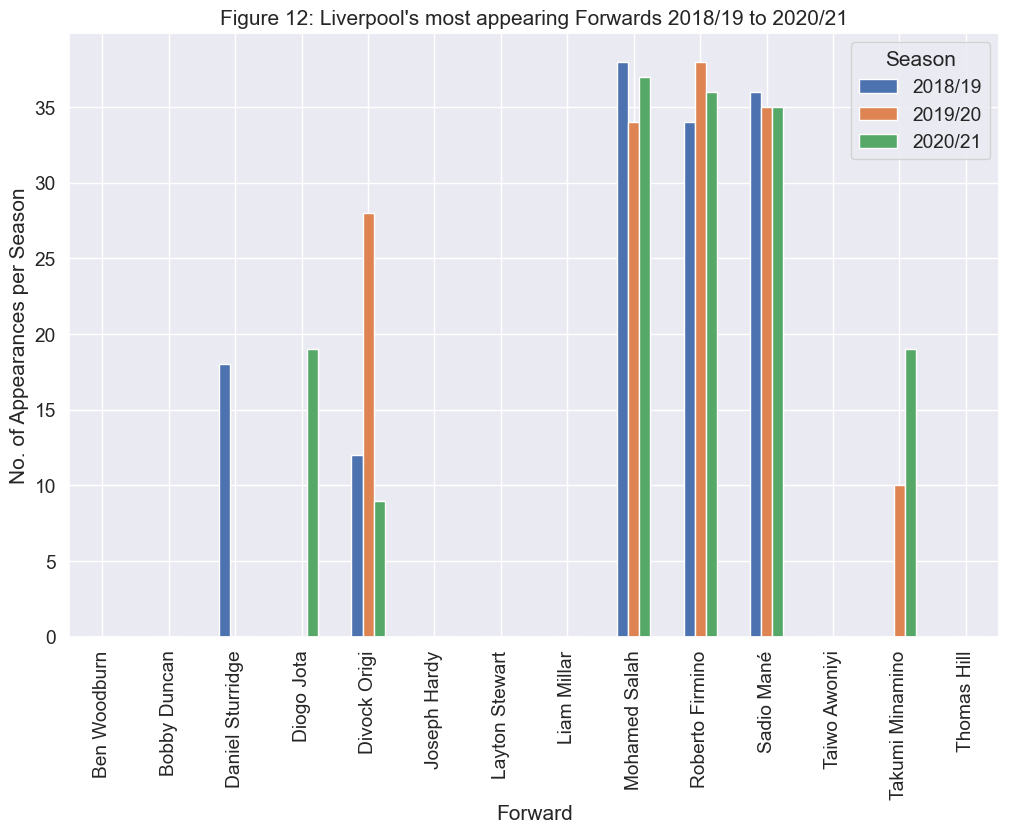

In [53]:
# Who are the most appearing Liverpool forwards in 2020/21?
most_appearing_forwards = pd.pivot_table(player_detail_df[(player_detail_df['position']=='Forward') & (player_detail_df.name.isin(transferred_players)== False)], index = ['name'], columns = ['season'],values = ['Overall_Appearances'], aggfunc=np.sum)
most_appearing_forwards.plot.bar()
plt.title("Figure 12: Liverpool's most appearing Forwards 2018/19 to 2020/21")
plt.xlabel('Forward')
plt.ylabel('No. of Appearances per Season')
plt.legend(["2018/19","2019/20",'2020/21']).set_title('Season')
plt.show()


front_three = ['Mohamed Salah', 'Roberto Firmino' , 'Sadio Mané']

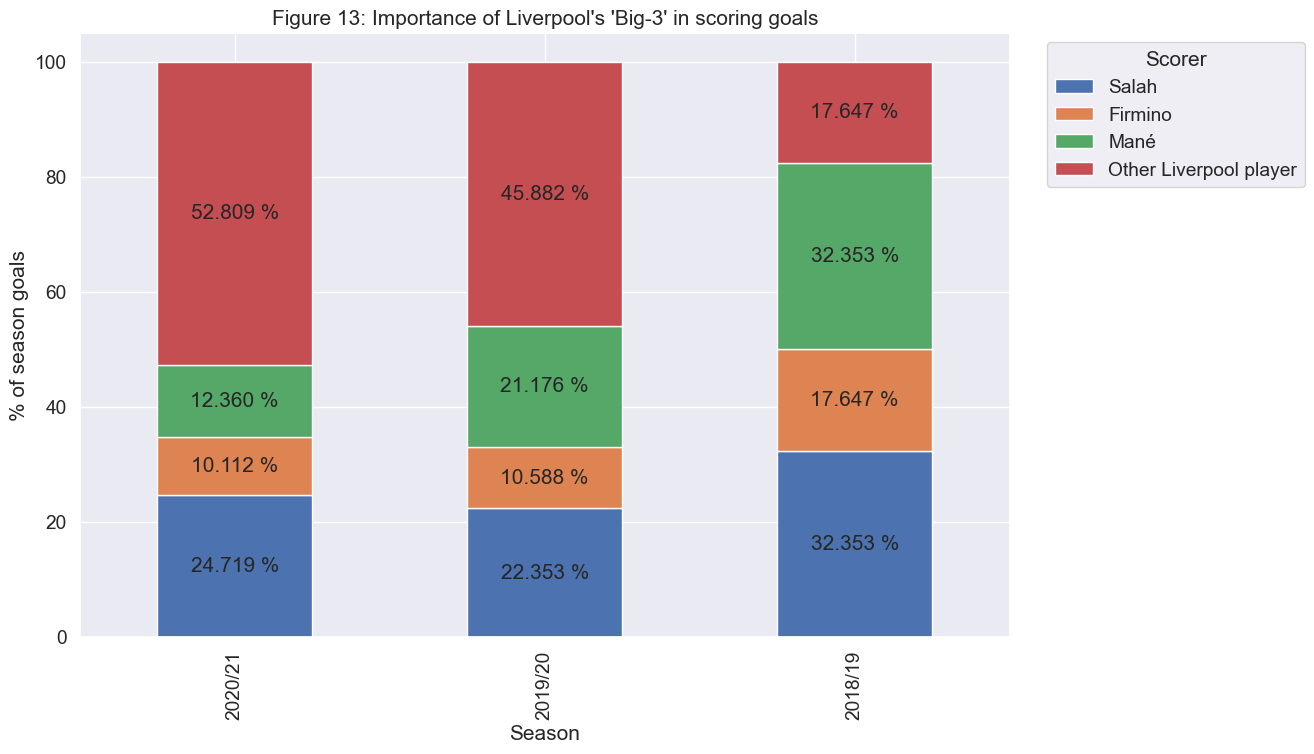

In [54]:
# Generating a chart of Liverpool's big-3 forward to overall Liverpool goals by season
temp = player_detail_df[(player_detail_df.name.isin(front_three)==True)]
counter = temp.groupby(['season','name'])['name','Attack_Goals'].sum().unstack()

counter['front_3_total'] = temp.groupby('season')['Attack_Goals'].sum()
counter['team_total']= team_stats_df.Overall_Goals.values
counter['non_front_3_goals'] = counter['team_total'] - counter['front_3_total']
counter = counter.drop(['front_3_total','team_total'], axis=1).sort_index(ascending=False)

percentage_dist = 100 * counter.divide(counter.sum(axis = 1), axis = 0)
ax = percentage_dist.plot.bar(stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.3f} %'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
    ax.invert_xaxis()
plt.title("Figure 13: Importance of Liverpool's 'Big-3' in scoring goals")
plt.legend(['Salah','Firmino','Mané','Other Liverpool player'],title = 'Scorer',bbox_to_anchor= (1.03, 1) )
plt.xlabel('Season')
plt.ylabel('% of season goals')
plt.show()

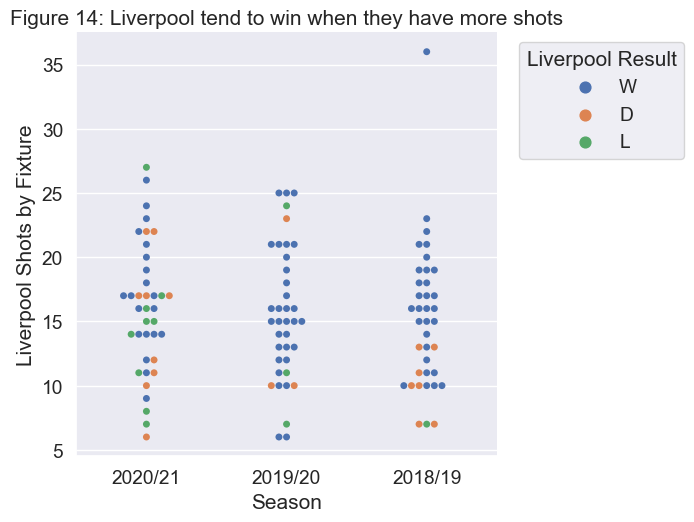

In [55]:
# Generating a chart showing fixture result versus shots by fixture by season
sns.catplot(x="season", y="liv_Shots", kind='swarm' , hue = 'liv_result',data=fixtures_final_df,legend = False).set(ylabel ="Liverpool Shots by Fixture", xlabel = "Season",title="Figure 14: Liverpool tend to win when they have more shots")
plt.legend(title = 'Liverpool Result',bbox_to_anchor= (1.03, 1) )
plt.show()

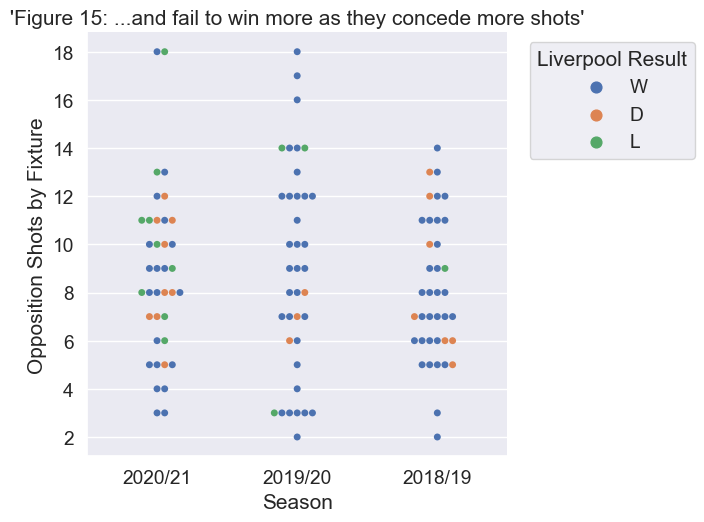

In [56]:
# Generating a chart showing fixture result versus shots conceded by fixture by season
sns.catplot(x="season", y="opp_Shots", kind='swarm' , hue = 'liv_result',data=fixtures_final_df,legend = False).set(ylabel ="Opposition Shots by Fixture", xlabel = "Season",title="'Figure 15: ...and fail to win more as they concede more shots'")
plt.legend(title = 'Liverpool Result',bbox_to_anchor= (1.03, 1) )
plt.show()

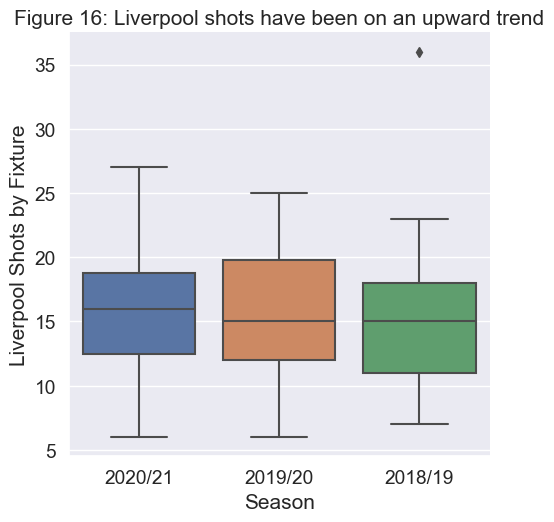

In [57]:
 # Generating a box and whisker plot showing liverpool shots by fixture by season
sns.catplot(x="season", y="liv_Shots", kind="box", data=fixtures_final_df).set(ylabel ="Liverpool Shots by Fixture", xlabel = "Season",title='Figure 16: Liverpool shots have been on an upward trend')
plt.show()

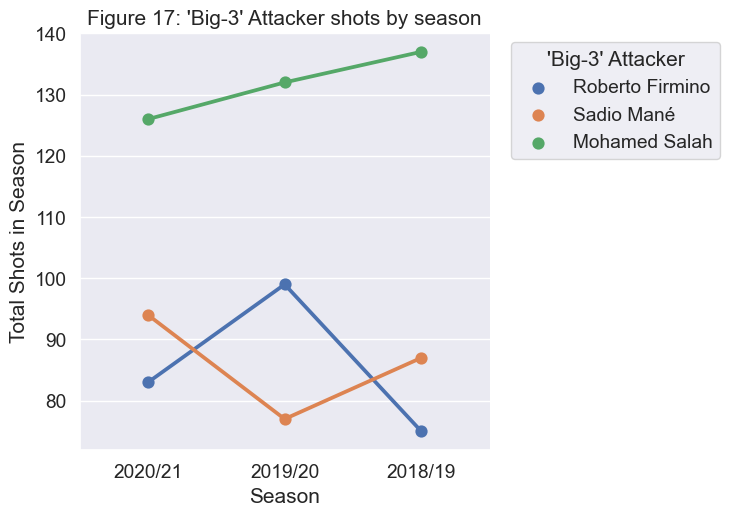

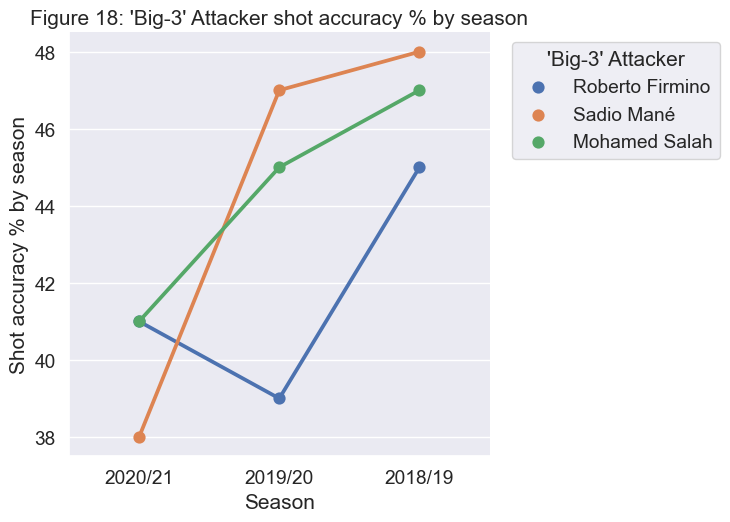

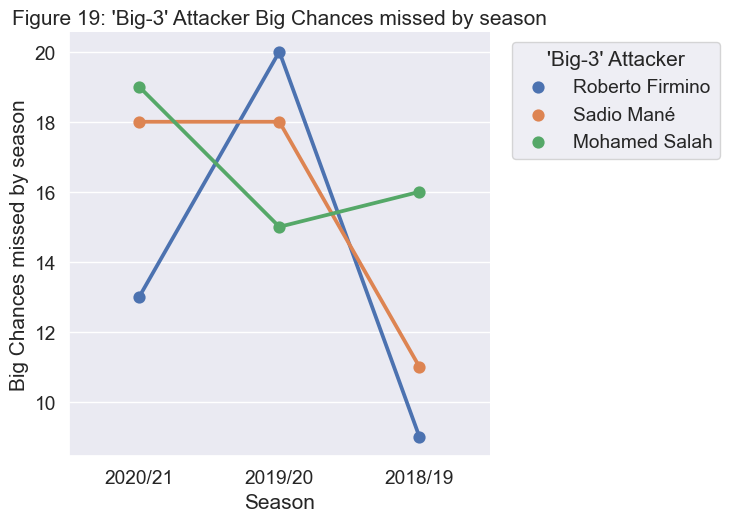

In [58]:
# showing the trend of the big-3 shots by season
sns.factorplot(x='season',y = 'Attack_Shots',hue = 'name',data=player_detail_df[player_detail_df.name.isin(front_three)==True], legend = False).set(ylabel ="Total Shots in Season", xlabel = "Season",title="Figure 17: 'Big-3' Attacker shots by season")
plt.legend(title = "'Big-3' Attacker",bbox_to_anchor= (1.03, 1) )
plt.show()

# showing the trend of the big-3 shot accuracy % by season
sns.factorplot(x='season',y='Attack_Shooting accuracy %', hue = 'name' , data = player_detail_df[player_detail_df.name.isin(front_three)==True], legend = False).set(ylabel ="Shot accuracy % by season", xlabel = "Season",title="Figure 18: 'Big-3' Attacker shot accuracy % by season")
plt.legend(title = "'Big-3' Attacker",bbox_to_anchor= (1.03, 1) )
plt.show()

# showing the trend of the big-3 big chances missed by season
sns.factorplot(x='season',y = 'Attack_Big chances missed',hue = 'name',data=player_detail_df[player_detail_df.name.isin(front_three)==True], legend = False).set(ylabel ="Big Chances missed by season", xlabel = "Season",title="Figure 19: 'Big-3' Attacker Big Chances missed by season")
plt.legend(title = "'Big-3' Attacker",bbox_to_anchor= (1.03, 1) )
plt.show()

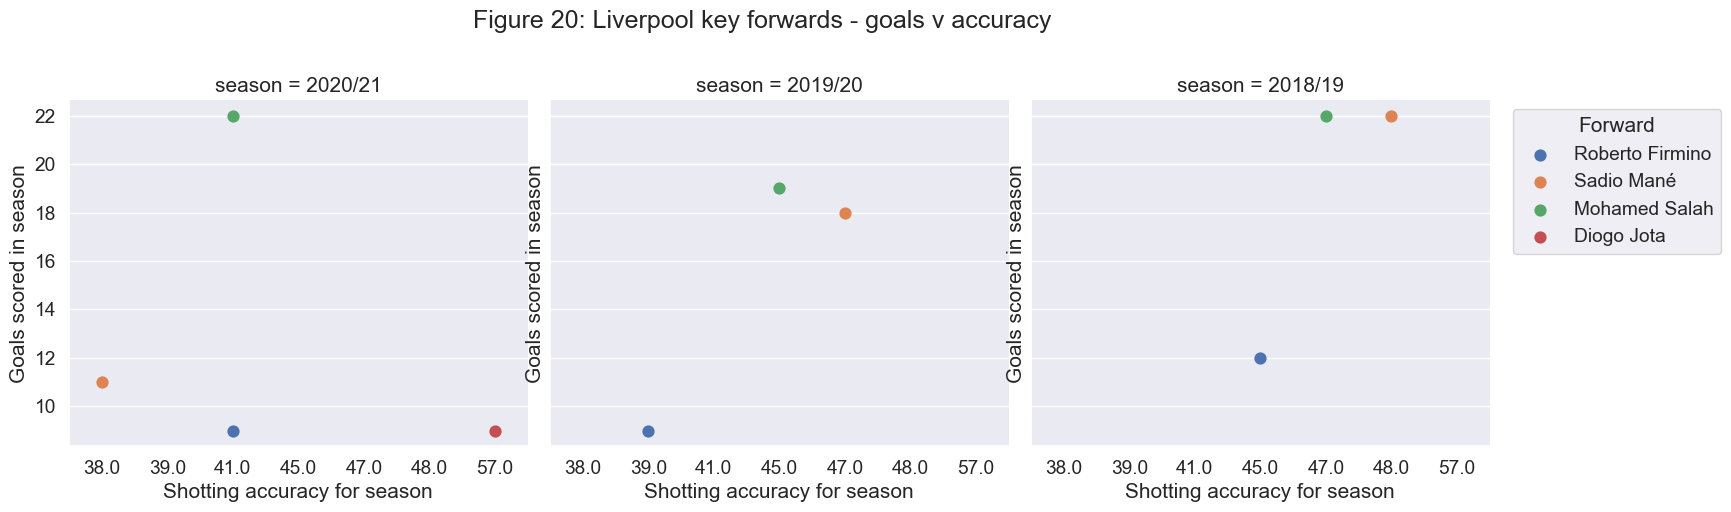

In [59]:
# showing the relationship between player goals and accuracy, and bringing in Jota
rp = sns.factorplot(x='Attack_Shooting accuracy %',y='Attack_Goals', hue = 'name' , col = 'season',data=player_detail_df[(player_detail_df.name.isin(front_three)==True) | (player_detail_df.name=='Diogo Jota')], legend = False).set(ylabel ="Goals scored in season", xlabel = "Shotting accuracy for season")
#fig.title("Figure 20: 'Big-3' Attacker Big Chances missed by season")
rp.fig.subplots_adjust(top=.8)
rp.fig.suptitle('Figure 20: Liverpool key forwards - goals v accuracy')
plt.legend(title = "Forward",bbox_to_anchor= (1.03, 1) )
plt.show()

**5. Defence**

Much commentary was afforded to Liverpool's defensive problems, for reasons that include the loss of key defenders Virgil van Dijk, Joe Gomez and Joel Matip. To cover the injury losses, Liverpool first played certain midfielders arguably out of position e.g. Fabinho, berfore turning to less experienced defenders such as Nathaniel Phillips, Ozan Kabak and Rhys Williams.

Given that the tree-based classifiers highlight a number of defensive statistics as important features, which is supported by the team statistics, Defence should be subject to particular focus. 

As Figure 21 illustrates, Liverpool are heavily reliant on five defenders, namely Andrew Robertson, Trent Alexander-Arnold, Virgil Van Dijk, Joe Gomez and Joel Matip. In particular, Virgil van Dijk had played every Premier League game during 2018/19 and 2019/20 before having his season cut-short after five games in 2020/21 due to injury (Figure 22).

To consider how the defence may have been impacted by these injuries, it is useful to consider various metrics across the three seasons, the role of midfielder Fabinho who the Liverpool manager played in defence to cover for injured established defenders and also to consider how uninjured key defenders, namely Andrew Robertson and Trent Alexander-Arnold, performed in 2020/21 versus the two prior seasons.

The box-whisker plots at Figures 23 and 24 indicate that though Liverpool are giving up about the same number of shots, more shots conceded were on target. That, combined with the 2020/21 Liverpool team having allowed their opponents more touches (Figure 25), having made fewer clearances (Figure 26) and having been forced into more Goalkeeper saves (Figure 27) suggest that the Liverpool team without those defenders were less defensively dominant or assertive and may have allowed their opponents shoot closer to goal (positional data and player heatmaps will likely confirm this). Though Liverpool made more tackles, their successful tackle rate decreased, suggesting that the Liverpool was under much more pressure than prior seasons (Figure 28).

It is also interesting to look at the role of Fabinho in 2020/21 versus prior seasons via a radar chart. Fabinho played more games in 2020/21 that in prior years (arguably as a result of being required to act as senior defender without significant senior competition for his place) and while a number of his 2020/21 defensive statistics saw an increase as a result of him playing further defensively, it is striking that a number of his 2020/21 defensive statistics were adverse, namely the number of tackles made, the number of duels won, the number of duels lost, the number of 50/50s lost as well as declining aerial battle metrics. Considering these metrics, it is suggested that playing Fabinho at centre-half back was not optimal and both he and the team is better suited with him undertaking his defensive work from a midfield position. The statistics further explain Liverpool's return to form in the later stages of the 2020/21 season that co-incided with Fabinho's return to midfield where younger defenders assumed defensive positions.

Liverpool's full-backs and their system in involving the full-backs, Andrew Robertson and Trent Alexander-Arnold, have been crucial to Liverpool's recent success. In 2018/19 and 2019/20, the full-backs were known as much if not more for their attacking prowess than their defensive ability or impact, amassing a combined 48 assists and seven goals between them in those two seasons, with neither obtaining less than 11 assists in one season. With the aforementioned injuries in central defence, comment was passed that the full-backs did not have as much creative license to attack as they had greater defensive responsibility and also that they did not have as much confidence to venture forward given that the central defence was not at the peak of its power. Accordingly, the full-backs managed a reduced seven assists each in 2020/21 and created fewer big chances (Figure 29). We also observe from Figure 30 that the number of crosses and the cross accuracy did not change signficiantly in 2020/21 on 2019/20, which suggests that their decreased assist tallies are as a result of poor fininshing by forwards rather than the full-backs reduced impact or poor crossing. 

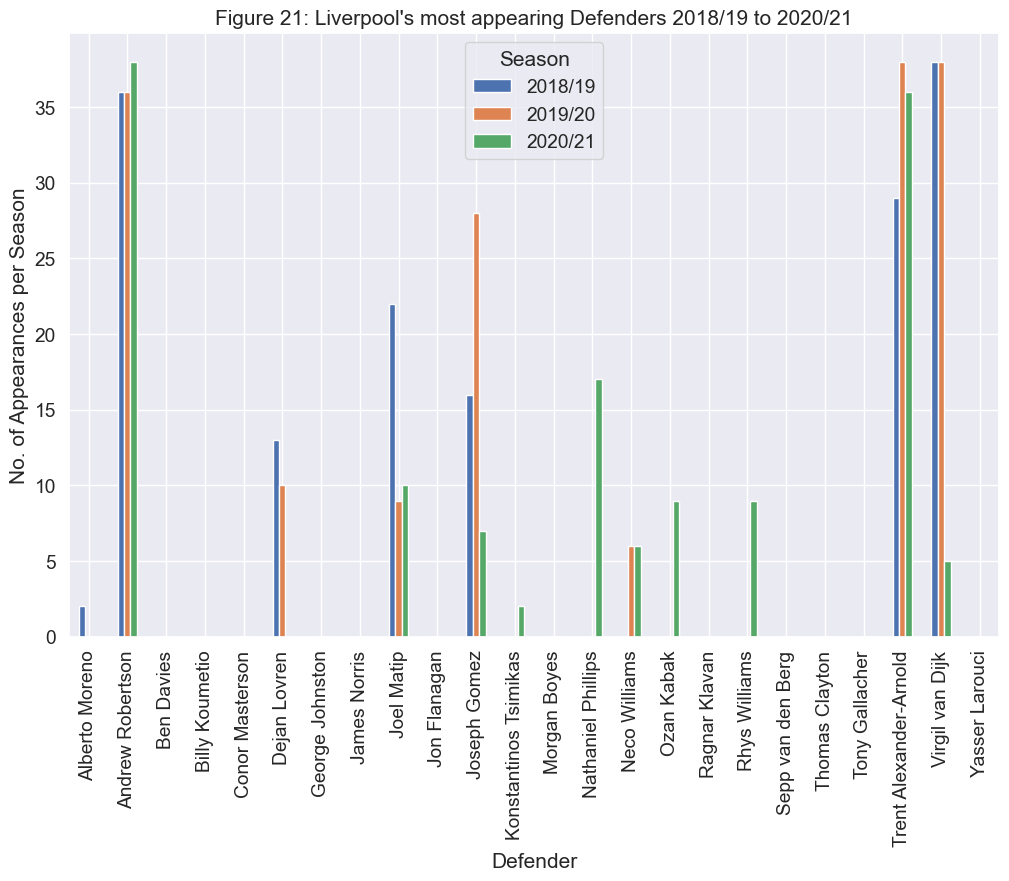

In [60]:
# Who are the most appearing Liverpool defenders?
most_appearing_defenders = pd.pivot_table(player_detail_df[(player_detail_df['position']=='Defender') & (player_detail_df.name.isin(transferred_players)== False)], index = ['name'], columns = ['season'],values = ['Overall_Appearances'], aggfunc=np.sum)
most_appearing_defenders.plot.bar()
plt.title("Figure 21: Liverpool's most appearing Defenders 2018/19 to 2020/21")
plt.xlabel('Defender')
plt.ylabel('No. of Appearances per Season')
plt.legend(["2018/19","2019/20",'2020/21']).set_title('Season')
plt.show()

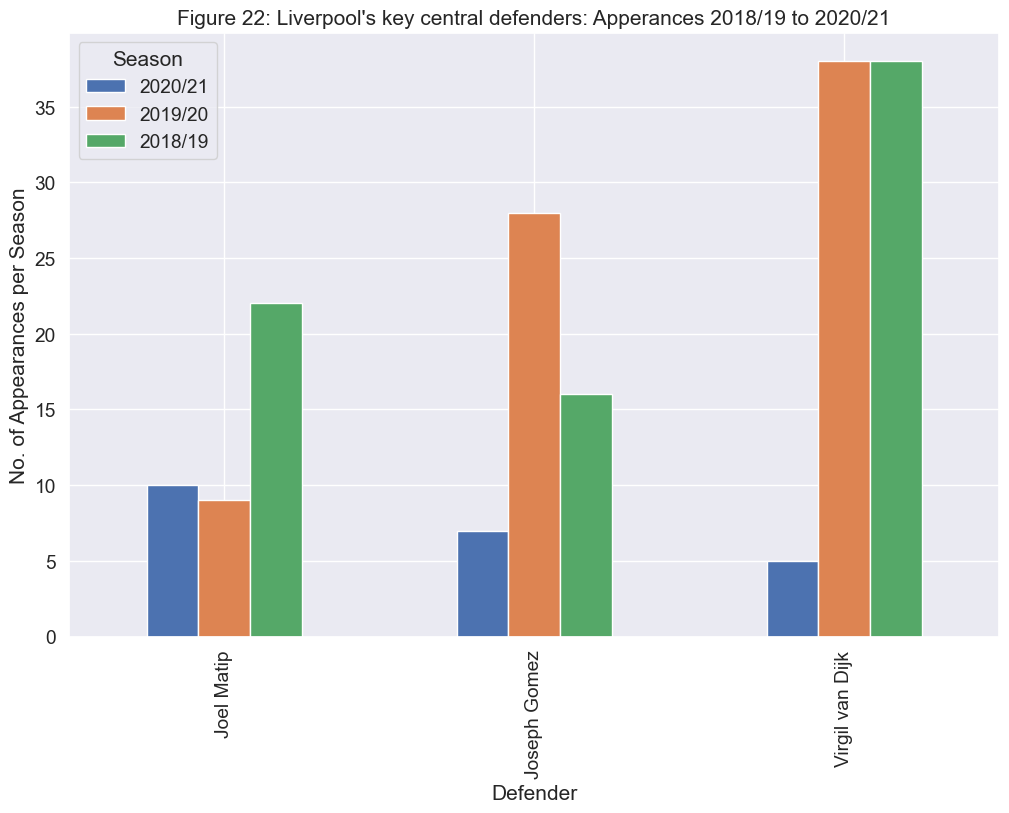

In [61]:
missing_defenders = ['Virgil van Dijk','Joseph Gomez', 'Joel Matip']
pd.pivot_table(player_detail_df[player_detail_df.name.isin(missing_defenders)], index = ['name'], columns = ['season'],values = ['Overall_Appearances'], aggfunc=np.sum).iloc[:,::-1].plot.bar()
plt.title("Figure 22: Liverpool's key central defenders: Apperances 2018/19 to 2020/21")
plt.xlabel('Defender')
plt.ylabel('No. of Appearances per Season')
plt.legend(["2020/21","2019/20",'2018/19']).set_title('Season')

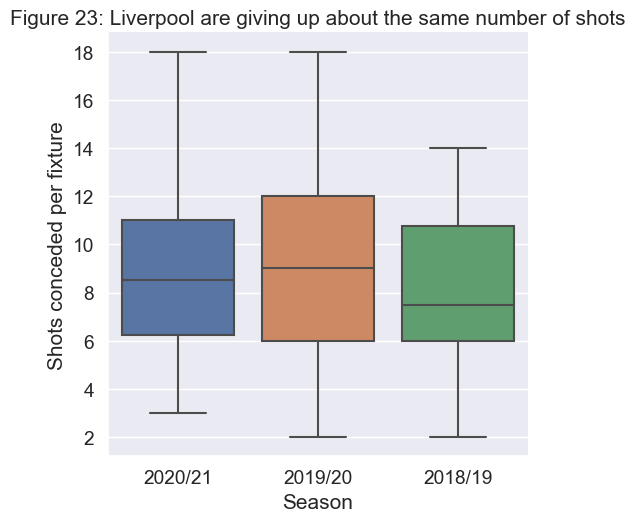

In [62]:
sns.catplot(x="season", y="opp_Shots", kind="box", data=fixtures_final_df)
plt.title('Figure 23: Liverpool are giving up about the same number of shots')
plt.xlabel('Season')
plt.ylabel('Shots conceded per fixture')
plt.show()

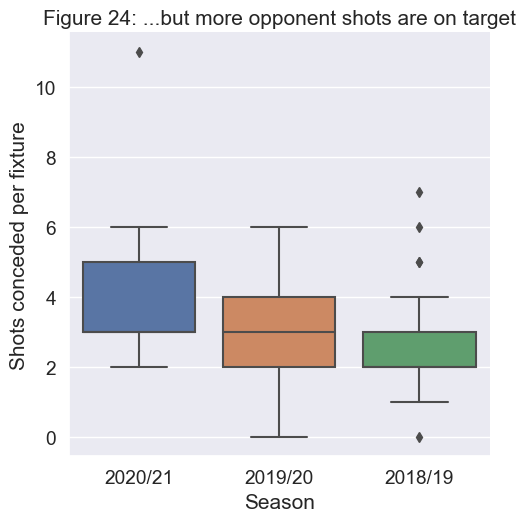

In [63]:
sns.catplot(x="season", y="opp_Shots on target", kind="box", data=fixtures_final_df)
plt.title('Figure 24: ...but more opponent shots are on target')
plt.xlabel('Season')
plt.ylabel('Shots conceded per fixture')
plt.show()

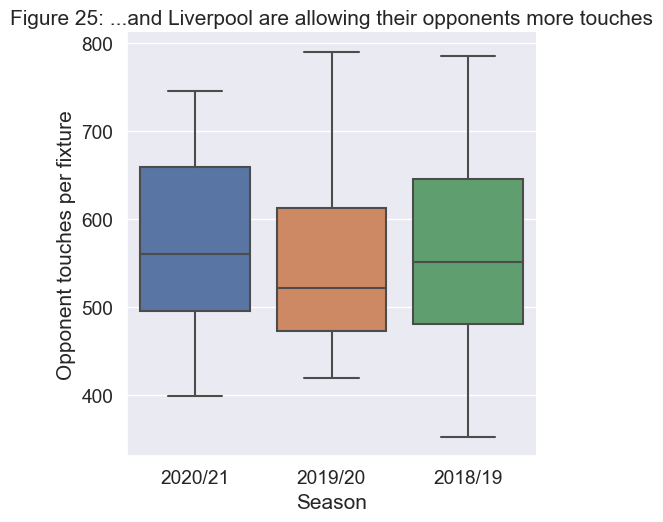

In [64]:
sns.catplot(x="season", y="opp_Touches", kind="box", data=fixtures_final_df)
plt.title('Figure 25: ...and Liverpool are allowing their opponents more touches')
plt.xlabel('Season')
plt.ylabel('Opponent touches per fixture')
plt.show()

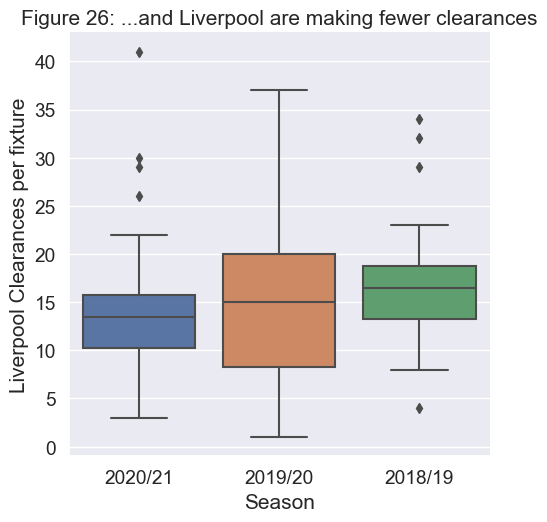

In [65]:
sns.catplot(x="season", y="liv_Clearances", kind="box", data=fixtures_final_df)
plt.title('Figure 26: ...and Liverpool are making fewer clearances')
plt.xlabel('Season')
plt.ylabel('Liverpool Clearances per fixture')
plt.show()

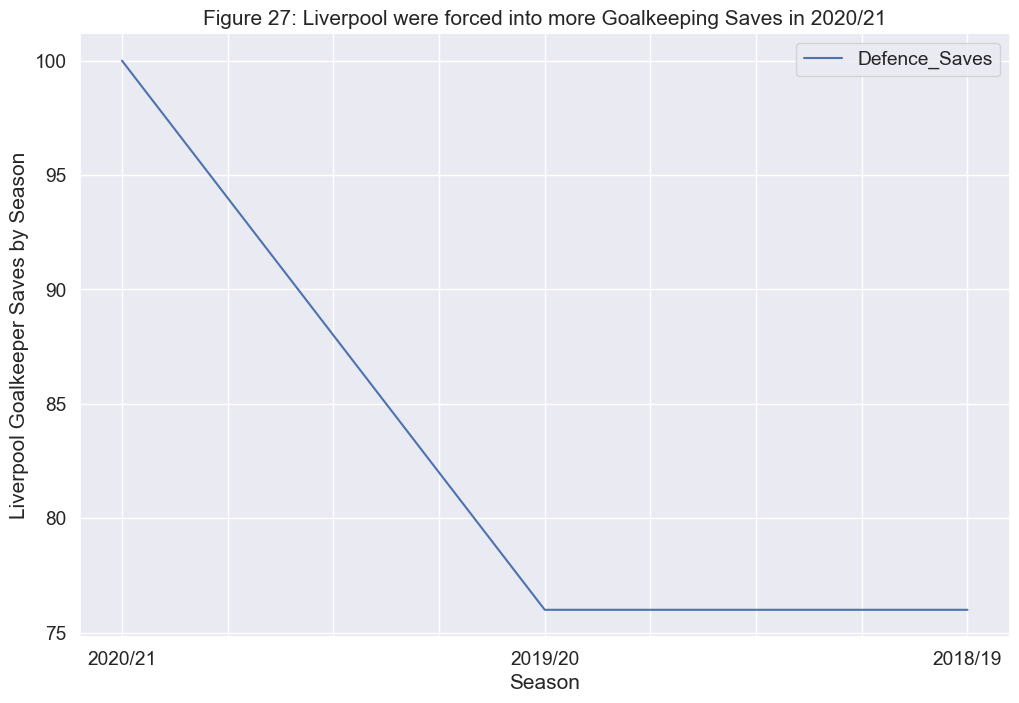

In [66]:
team_stats_df.plot(x='season',y='Defence_Saves')
plt.title('Figure 27: Liverpool were forced into more Goalkeeping Saves in 2020/21')
plt.xlabel('Season')
plt.ylabel('Liverpool Goalkeeper Saves by Season')
plt.show()

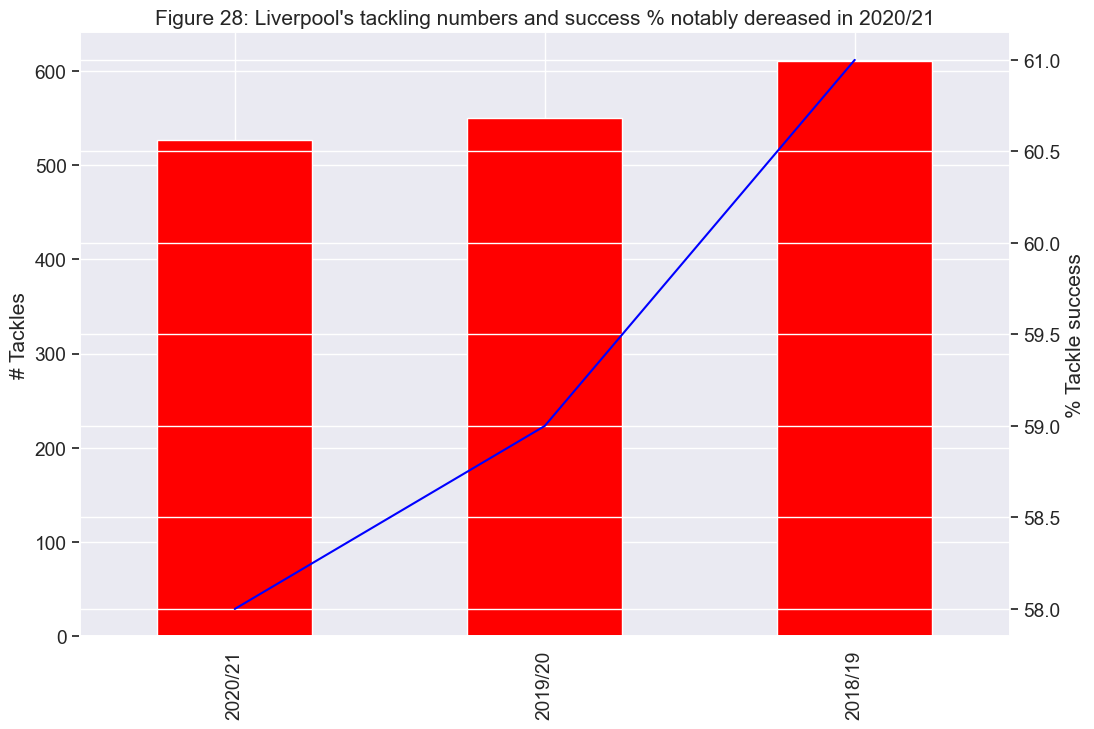

In [67]:
fig = plt.figure()

ax = fig.add_subplot()
ax2 = ax.twinx()

team_stats_df.Defence_Tackles.plot(x = 'season',kind='bar', color='red', ax=ax)
team_stats_df['Defence_Tackle success %'].plot(x = 'season', kind='line', color='blue', ax=ax2)

ax.set_xticklabels(team_stats_df.season)
ax.set_ylabel('# Tackles')
ax2.set_ylabel('% Tackle success')
plt.xlabel('Season')
plt.title("Figure 28: Liverpool's tackling numbers and success % notably dereased in 2020/21")
plt.show()

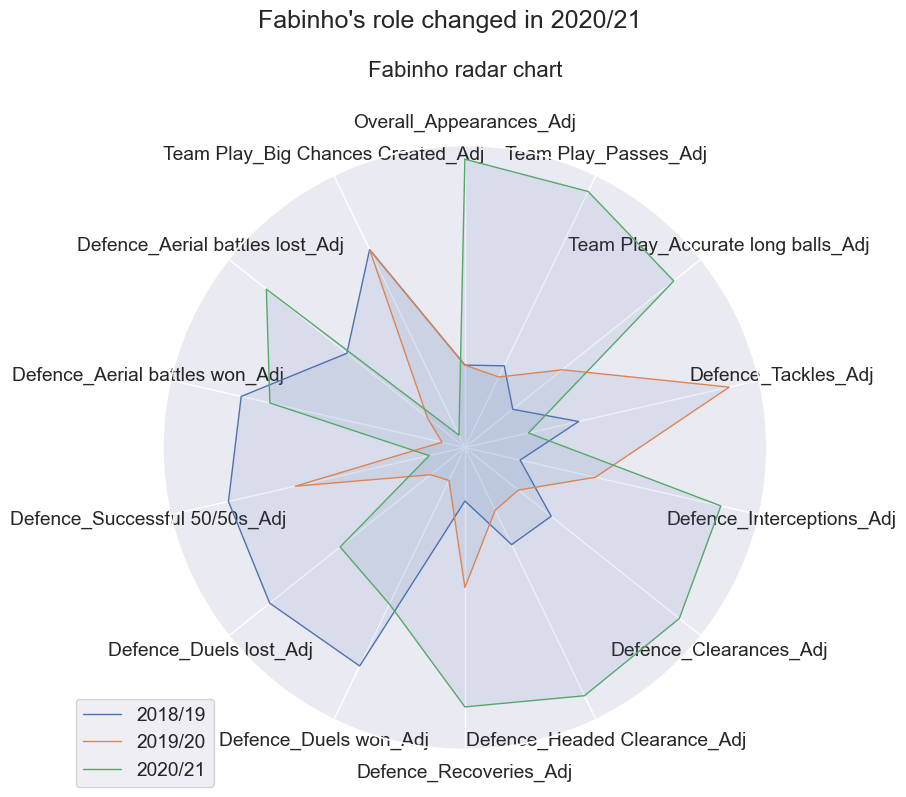

In [68]:
# taking a look at Fabinho's role via a Radar Chart
player = "Fabinho"
factors = ['Overall_Appearances', 'Team Play_Passes','Team Play_Accurate long balls','Defence_Tackles','Defence_Interceptions','Defence_Clearances','Defence_Headed Clearance', 'Defence_Recoveries','Defence_Duels won','Defence_Duels lost','Defence_Successful 50/50s','Defence_Aerial battles won','Defence_Aerial battles lost','Team Play_Big Chances Created']
ax  = get_player_radarchart(player_detail_df, player, factors)
plt.suptitle("Fabinho's role changed in 2020/21").set_position([.5,1.05])
plt.show()

In [69]:
# Looking at Andrew Robertson's and Trent Alexander-Arnold's key statistics in last 3 season
player_detail_df[player_detail_df.name.isin(['Andrew Robertson','Trent Alexander-Arnold'])].drop([c for c in player_detail_df.columns if c[:5] == 'Goalk']+['Overall_Clean sheets','Team Play_Goals','Attack_Penalties scored','Attack_Freekicks scored','Attack_Shots','Attack_Shots on target','Attack_Shooting accuracy %','Attack_Big chances missed','Attack_Goals per match'], axis = 1).groupby(['season','name']).sum().T.iloc[:,::-1].astype(int).style.background_gradient(axis=1).set_caption("Comparing key Liverpool Full-Back statistics 2018/19 to 2020/21")

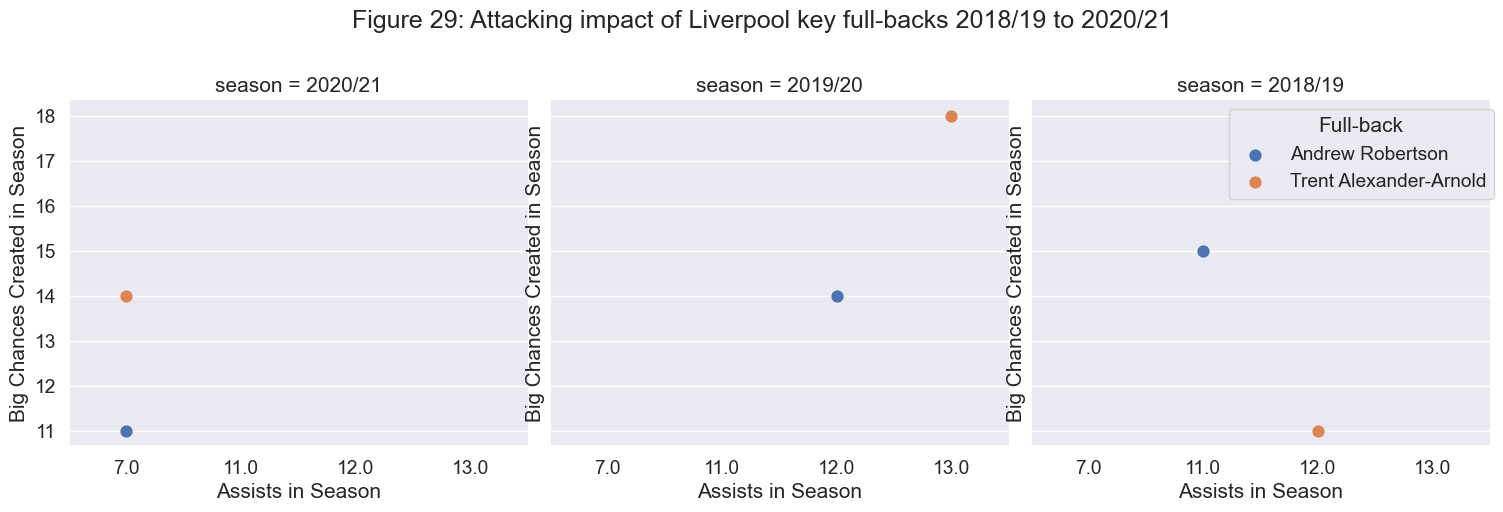

In [70]:
# Looking at the full-backs: assist and big chances created
rp = sns.factorplot(x='Team Play_Assists',y='Team Play_Big Chances Created', hue = 'name' , col = 'season',data=player_detail_df[(player_detail_df.name.isin(['Andrew Robertson','Trent Alexander-Arnold'])==True)], legend = False).set(ylabel ="Big Chances Created in Season", xlabel = "Assists in Season")
rp.fig.subplots_adjust(top=.8)
rp.fig.suptitle('Figure 29: Attacking impact of Liverpool key full-backs 2018/19 to 2020/21')
plt.legend(title = "Full-back",bbox_to_anchor= (1.03, 1) )
plt.show()

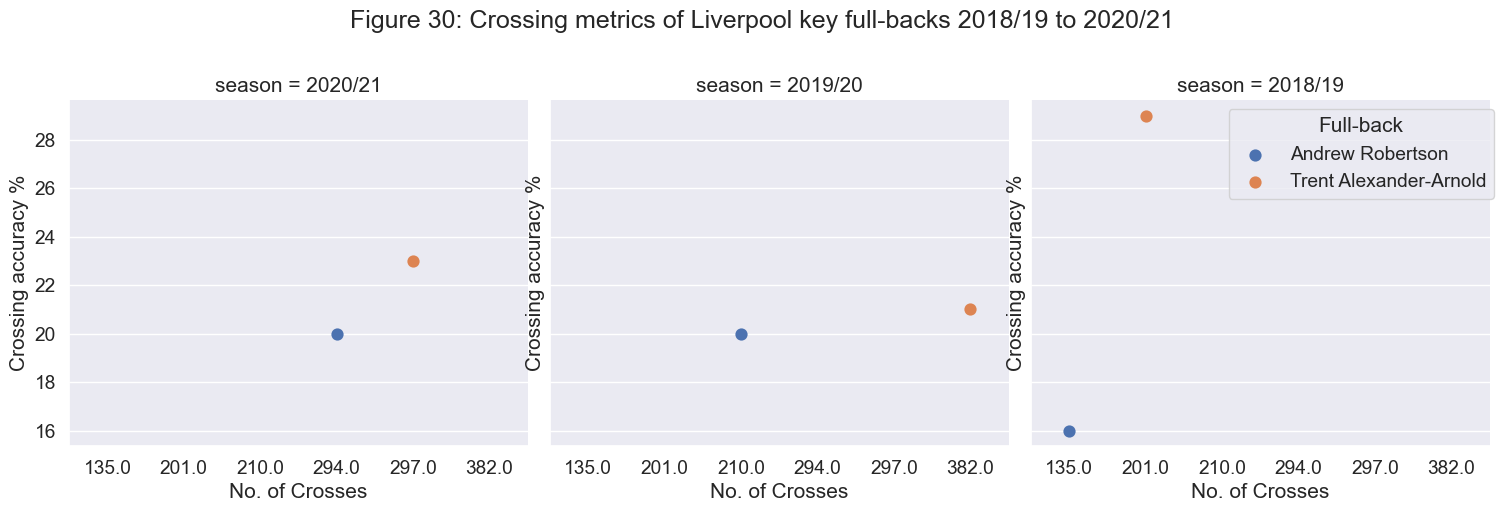

In [71]:
# Looking at the full-backs: crosses and cross accuracy
rp = sns.factorplot(x='Team Play_Crosses',y='Team Play_Cross accuracy %', hue = 'name' , col = 'season',data=player_detail_df[(player_detail_df.name.isin(['Andrew Robertson','Trent Alexander-Arnold'])==True)], legend = False).set(ylabel ="Crossing accuracy %", xlabel = "No. of Crosses")
rp.fig.subplots_adjust(top=.8)
rp.fig.suptitle('Figure 30: Crossing metrics of Liverpool key full-backs 2018/19 to 2020/21')
plt.legend(title = "Full-back",bbox_to_anchor= (1.03, 1) )
plt.show()

**6. Liverpool's most important players**

Figure 31 denotes Liverpool's most important players and their associated win-rates. The win-rates greater than 80% for Virgil van Dijk and Joseph Gomez are noteworthy given that, as discussed earlier, they were the two first team players that missed much of the 2020/21 season through injury. 

Only three of the top-10 appearing players are midfielders. We discussed Fabinho earlier, however the roles of Georginho Wijnaldum (departed at end of 2020/21) and team captain Jordan Henderson are noted given their high number of appearances and their win-rates of 72% and 74% respectively. 

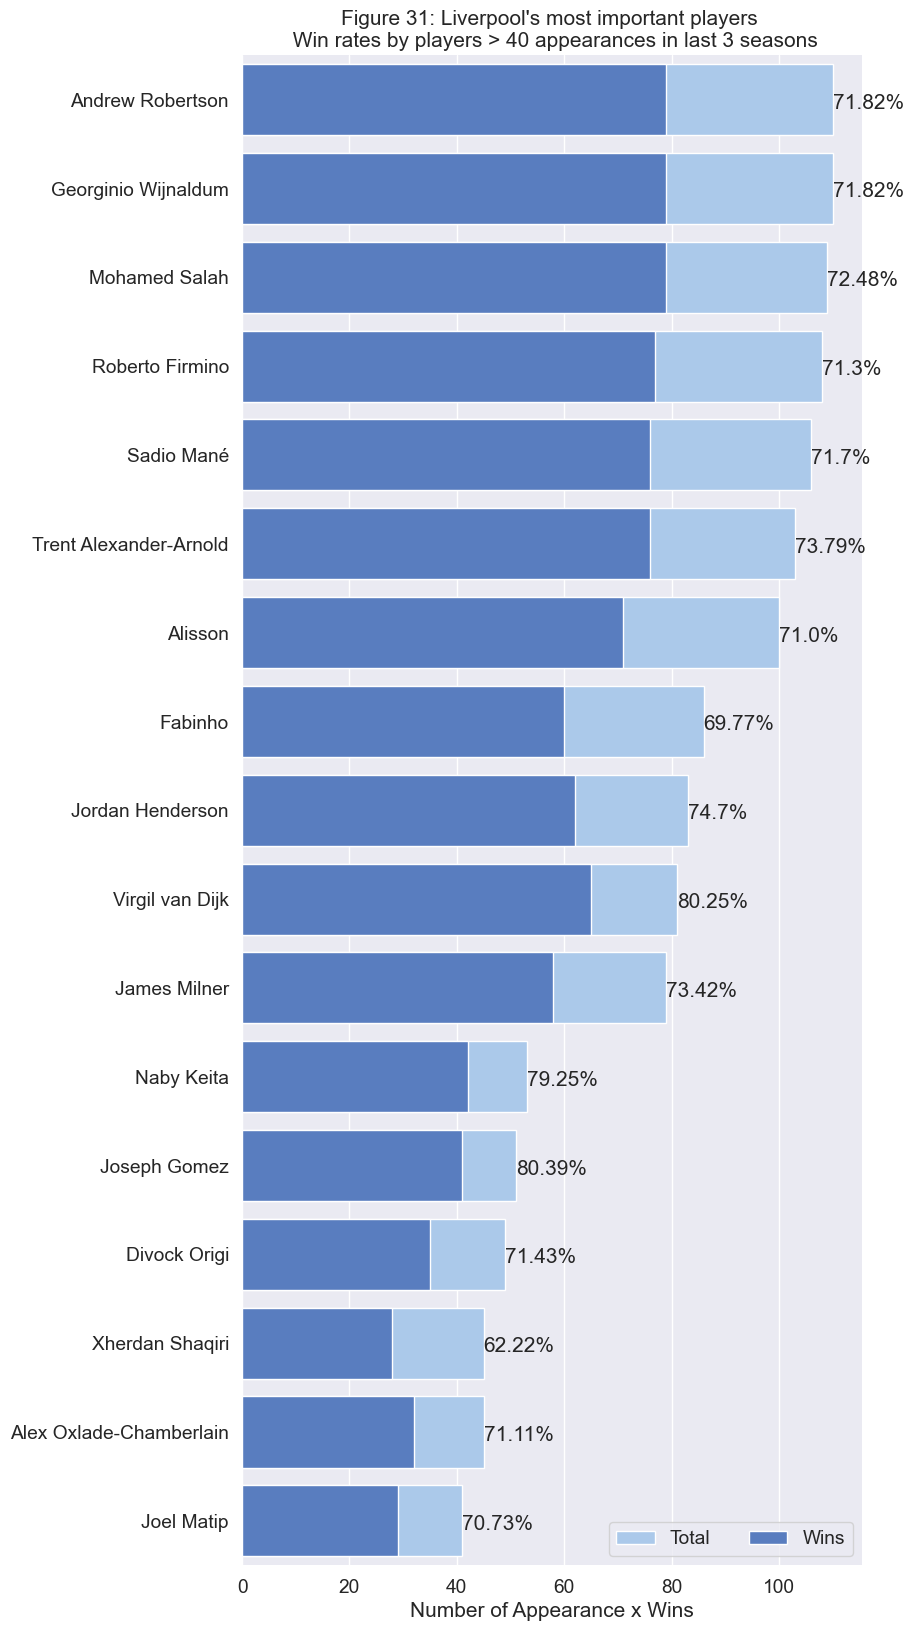

In [72]:
# Generating chart of most appearing players
most_appearing_players = player_detail_df.groupby('name').sum().sort_values(by='Overall_Appearances', ascending=False)
most_appearing_players['win_rate'] = most_appearing_players.Overall_Wins / most_appearing_players.Overall_Appearances
most_appearing_players = most_appearing_players.loc[most_appearing_players['Overall_Appearances']>40][['Overall_Appearances','Overall_Wins','win_rate']].sort_values(by='Overall_Appearances', ascending=False)
most_appearing_players = most_appearing_players[most_appearing_players.index.isin(transferred_players)==False]

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 20))

sns.set_color_codes("pastel")
sns.barplot(x="Overall_Appearances", y=most_appearing_players.index, data=most_appearing_players,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="Overall_Wins", y=most_appearing_players.index, data=most_appearing_players,
            label="Wins", color="b")

for i in range(len(most_appearing_players.index)):
    ax.text(ax.patches[i].get_width(), ax.patches[i].get_y() +.50, 
            str(round(most_appearing_players.win_rate[i]*100,2))+"%")
            
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Number of Appearance x Wins", title = "Figure 31: Liverpool's most important players \n Win rates by players > 40 appearances in last 3 seasons")
sns.despine(left=True, bottom=True)

**7. Liverpool's toughest opponents and views on Liverpool 2020/21 leakiness and lack of proliferation**

It is useful to look at Liverpool’s results against other teams across the three seasons and the amount of Premier League points that Liverpool earned against each team. We observed earlier in the team statistics table that in 2018/19 and 2019/20 Liverpool earned an average of 2.55 and 2.6 points per fixture respectively, however this declined significantly to 1.82 in 2020/21.

Liverpool’s most difficult opponent in the past three seasons has clearly been Manchester City, the team that won the league in 2018/19 and 2020/21 and finished second to Liverpool in 2019/20. Liverpool earned on average 0.833 of a point in the six fixtures they have played and there is quite a difference between the next toughest opponent, local rivals Everton (1.5 points) (Figure 32). 

When we compare the 14 teams that Liverpool played each of the last three seasons, we observe that many points lost in 2020/21 were against teams that Liverpool to that point had 100% records agaubst (e.g. Southampton, Newcastle and Brighton). Additionally Liverpool earned fewer points in 2020/21 than each of the two prior seasons against teams such as Leicester, Everton, Chelsea and Burnley. The only team that Liverpool earned more points against in 2020/21 versus the two prior seasons was Arsenal (Figure 33).

Goals scored and conceded appears to have had an effect on the results. We observe from Figure 34 Liverpool failed to score in eight fixtures in 2020/21 (compared to twice in each of 2019/20 and 2018/19) and Figure 34's distribution of number of goals by fixture illustrates that in 2020/21 Liverpool were generally much more prolific.

Figure 35 flags that Liverpool’s defence in 2020/21 was not as steadfast as prior seasons, but it was not significantly leakier. 2020/21 saw only 12 clean sheets (versus 21 and 17 in 2018/19 and 2019/20 respectively), however Liverpool conceded two or more goals only once more than 2019/20 and only three times more than 2018/19. 

Figure 36 verifies Liverpool were more dominant over opponents in prior seasons with 2018/19 and 2019/20 margin of results more skewed toward the right with higher goal difference in Liverpool’s favour versus 2020/21. Figure 37 highlights that in particular Liverpool's goals have significantly reduced at home in particular - perhaps absence of home crowds in 2020/21 due to COVID-19 played a role here.

Figures 38 and 39 note that possession has not had a material outcome on Liverpool fixture outcome in the last three seasons and possession metrics have not materially varied during this period.

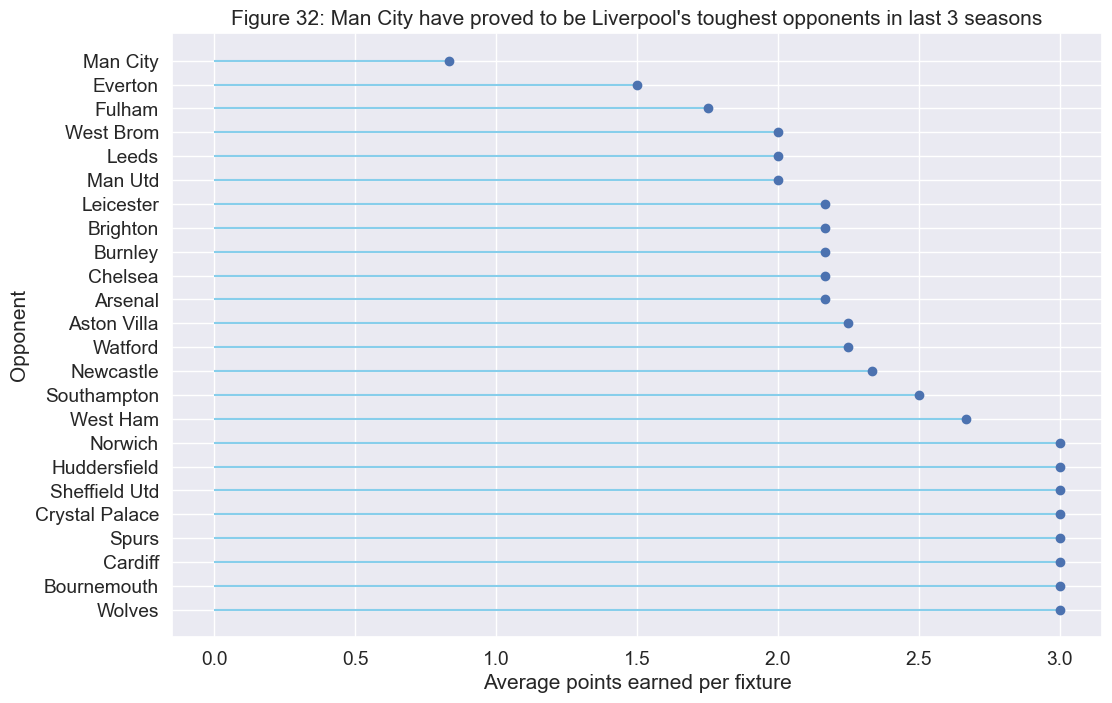

In [73]:
# Looking at average points obtained against teams
team_comp_df = fixtures_final_df.groupby('opponent').sum()
team_comp_df['average_points_from_opp']=team_comp_df.liv_points_from_opp / (team_comp_df.liv_home * 2)
team_comp_df = team_comp_df.sort_values(by = 'average_points_from_opp', ascending = False)

plt.hlines(y=np.arange(team_comp_df.shape[0]),xmin=0,xmax=team_comp_df['average_points_from_opp'],color="skyblue")
plt.plot(team_comp_df['average_points_from_opp'], np.arange(team_comp_df.shape[0]), "o")
plt.yticks(np.arange(team_comp_df.shape[0]), team_comp_df.index)
plt.title("Figure 32: Man City have proved to be Liverpool's toughest opponents in last 3 seasons")
plt.ylabel("Opponent")
plt.xlabel("Average points earned per fixture")
plt.show()

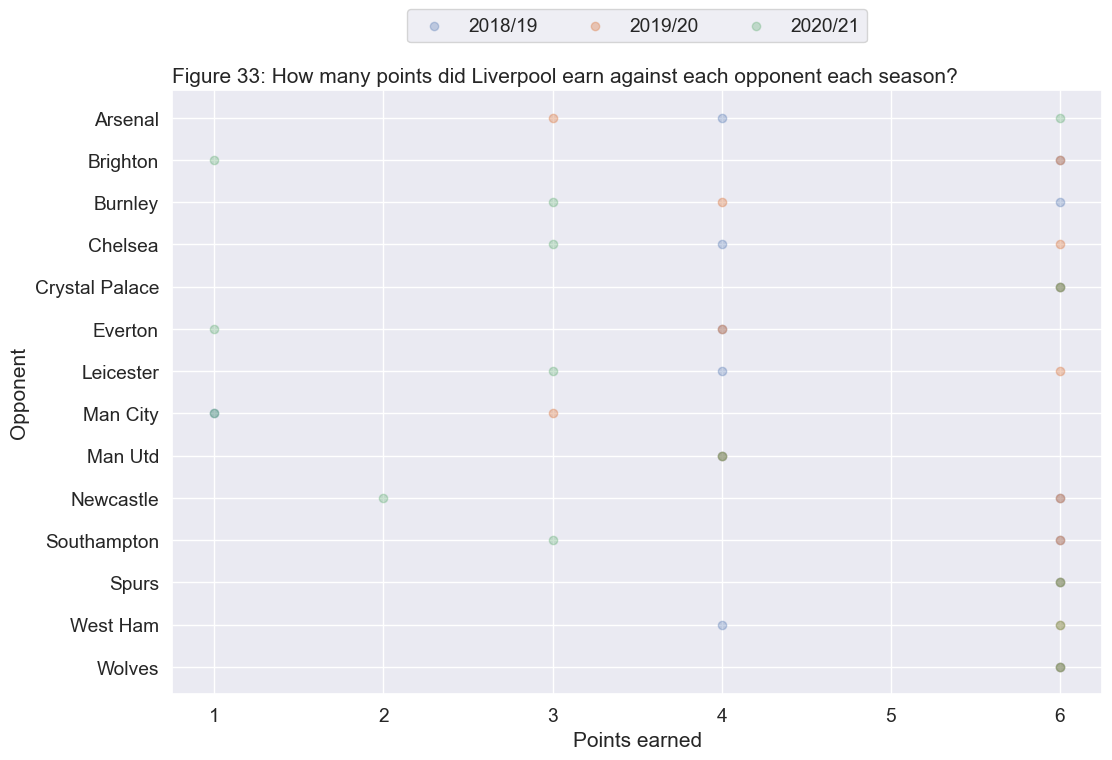

In [74]:
# charting the variance of Liverpool's results against the opponents Liverpool played in each of the last three seasons
teams_played_thrice = fixtures_final_df.opponent.value_counts()
teams_played_thrice = teams_played_thrice[teams_played_thrice ==6]
teams_played_thrice = teams_played_thrice.index.to_list()

x = fixtures_final_df[fixtures_final_df.opponent.isin(teams_played_thrice)]
x = x.groupby(['opponent','season']).agg({'liv_points_from_opp':'sum'}).unstack(fill_value=0)

# The horizontal plot is made using the hline function
plt.hlines(y=np.arange(x.shape[0]), xmin=x[('liv_points_from_opp', '2020/21')], xmax = x[('liv_points_from_opp', '2020/21')], color='grey', alpha=1)
plt.scatter(x[('liv_points_from_opp', '2018/19')], np.arange(x.shape[0]),alpha=.3, label='2018/19')
plt.scatter(x[('liv_points_from_opp', '2019/20')], np.arange(x.shape[0]),alpha=.4, label='2019/20')
plt.scatter(x[('liv_points_from_opp', '2020/21')], np.arange(x.shape[0]),alpha=.3, label='2020/21')

plt.legend()
plt.yticks(range(x.shape[0]), x.index)
plt.title("Figure 33: How many points did Liverpool earn against each opponent each season?", loc='left')
plt.xlabel('Points earned')
plt.ylabel('Opponent')
plt.legend(loc = 'upper center', bbox_to_anchor=(0.5,1.15), ncol=3)
plt.gca().invert_yaxis()

plt.show()

#x = fixtures_final_df[fixtures_final_df.opponent.isin(teams_played_thrice)]
#x = x.groupby(['opponent','season']).sum().unstack().plot(kind='bar',y='liv_points_from_opp')
#plt.show()

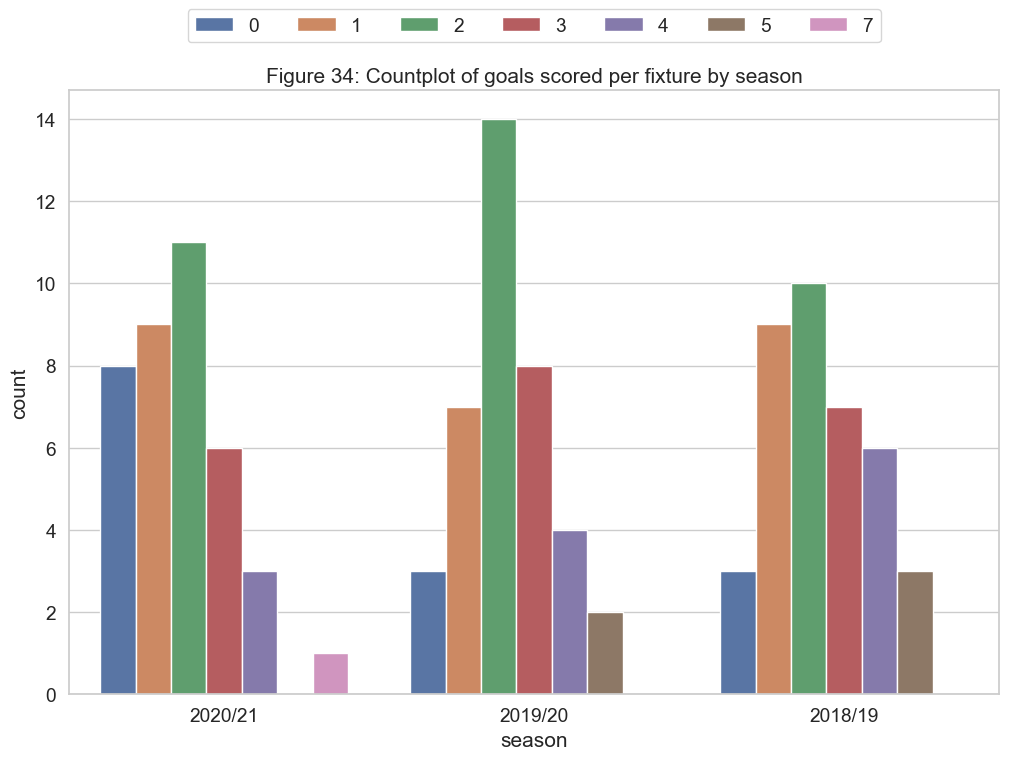

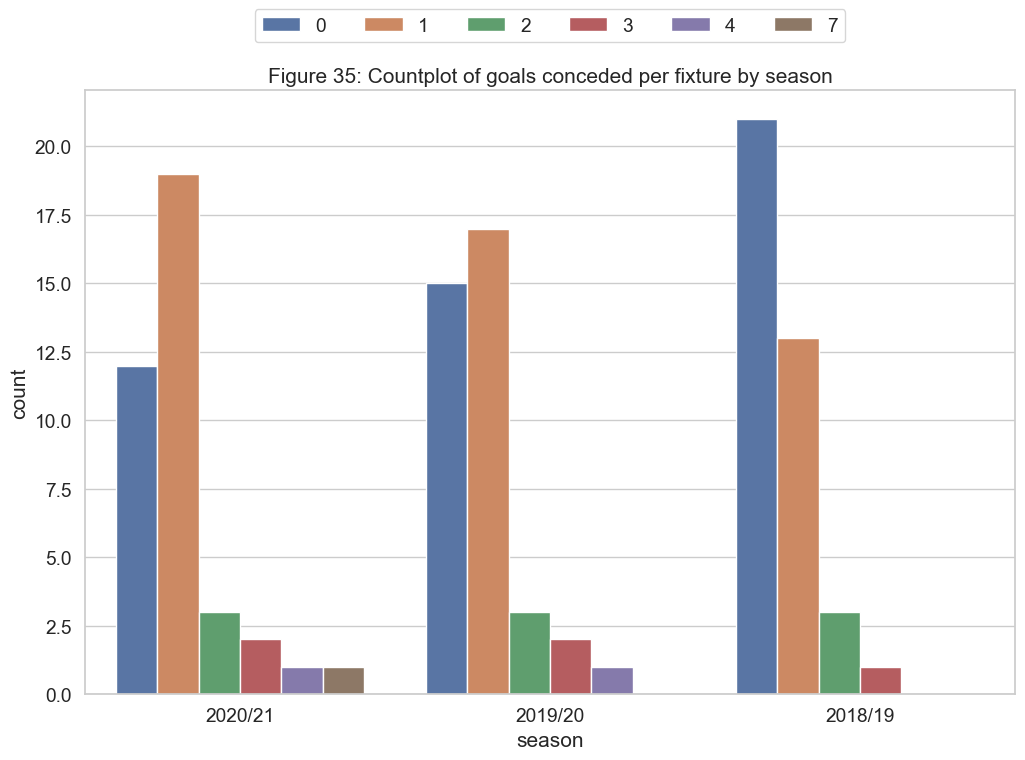

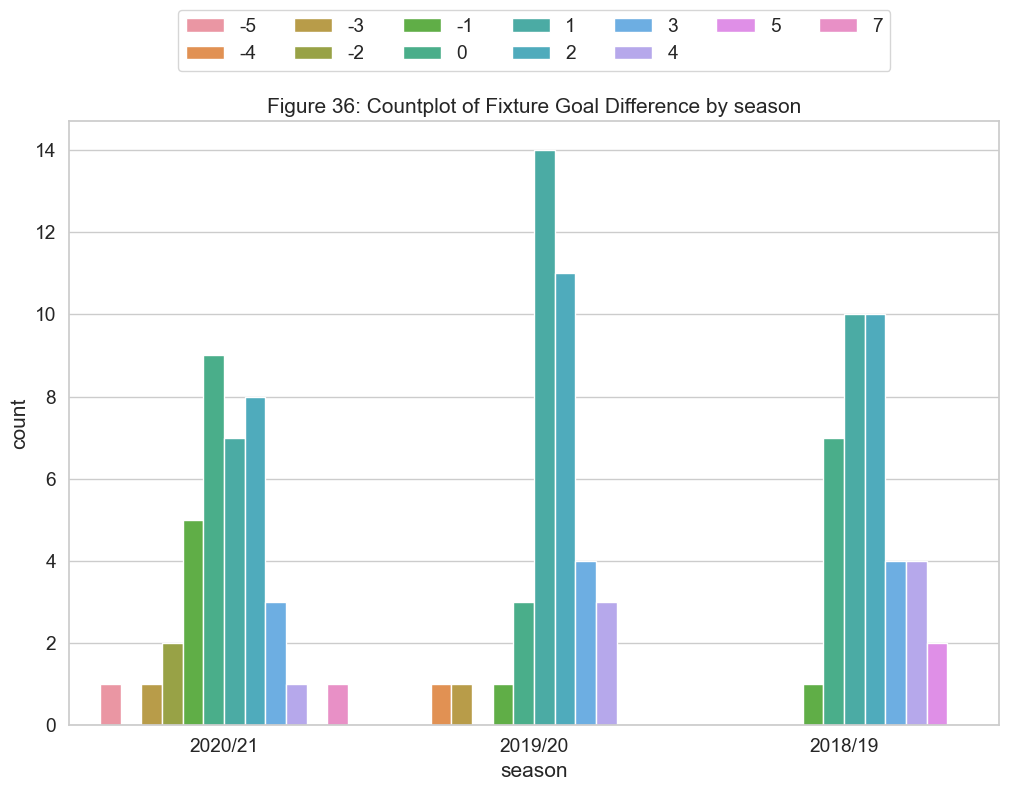

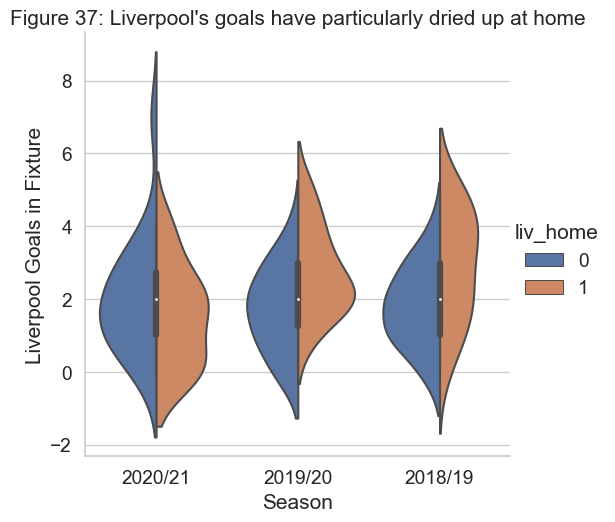

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='season',hue = 'liv_score',data=fixtures_final_df).set(title="Figure 34: Countplot of goals scored per fixture by season")
plt.legend(loc = 'upper center', bbox_to_anchor=(0.5,1.15), ncol=7)
plt.show()

sns.set_style('whitegrid')
sns.countplot(x='season',hue = 'opp_score',data=fixtures_final_df).set(title="Figure 35: Countplot of goals conceded per fixture by season")
plt.legend(loc = 'upper center', bbox_to_anchor=(0.5,1.15), ncol=7)
plt.show()

sns.set_style('whitegrid')
sns.countplot(x='season',hue = 'result_margin',data=fixtures_final_df).set(title="Figure 36: Countplot of Fixture Goal Difference by season")
plt.legend(loc = 'upper center', bbox_to_anchor=(0.5,1.2), ncol=7)
plt.show()

sns.catplot(x="season", y="liv_score", kind="violin", hue = 'liv_home', split = True, data=fixtures_final_df).set(title="Figure 37: Liverpool's goals have particularly dried up at home")
plt.xlabel('Season')
plt.ylabel('Liverpool Goals in Fixture')
plt.show()

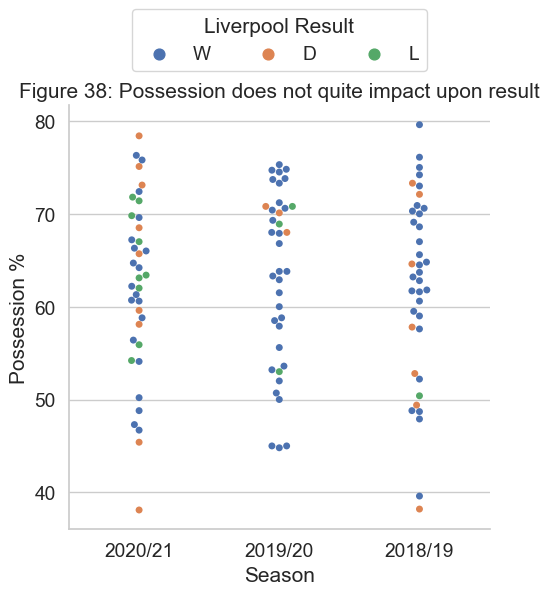

In [76]:
sns.catplot(x="season", y="liv_Possession %", kind='swarm' , hue = 'liv_result',data=fixtures_final_df, legend = False)
plt.title('Figure 38: Possession does not quite impact upon result')
plt.ylabel('Possession %')
plt.xlabel('Season')
plt.legend(title = 'Liverpool Result',loc = 'upper center', bbox_to_anchor=(0.5,1.25), ncol=3)
plt.show()

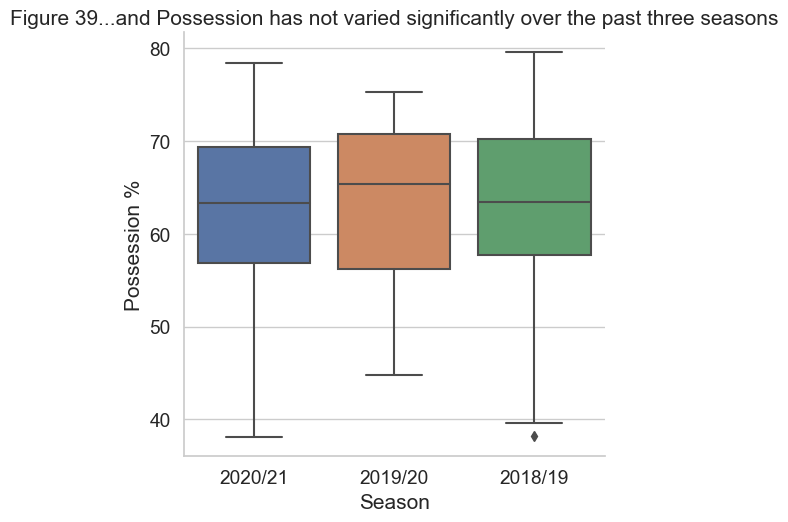

In [77]:
sns.catplot(x="season", y="liv_Possession %", kind="box", data=fixtures_final_df)
plt.title('Figure 39...and Possession has not varied significantly over the past three seasons')
plt.ylabel('Possession %')
plt.xlabel('Season')
plt.show()

# 5. Conclusion and further work


The work in this project was intended to be in keeping with the sports data analytics revolution that we find ourselves in. This project has examined official Liverpool team, player and fixture data obtained from www.premierleague.com for the last three seasons 2020/21, 2019/20 and 2018/19 in order to assess the reasons behind Liverpool's poor performance in 2020/21 compared with the two prior seasons. 

Seasoned commentators attribute much of Liverpool's 2020/21 shortcomings to defensive issues, caused mainly by the absesnce of key defenders. Having verified that Liverpool's record was indeed poorer in 2020/21 when compared with prior years, we considered various team, player and fixture statistics and ascertained that while the absence of key defenders represents an acceptable hyptothesis to an extent, this study has in particular highlighted Liverpool's attacking issues as the reason for their poor 2020/21 performance, particularly by Liverpool's big-3 forwards of Mohamed Salah, Roberto Firmino and Sadio Mané. It was important that Liverpool added credible competition to that under-firing trio, and they did in 2020/21 via Diogo Jota.

Though Liverpool had more shots, more passes, better passing accuracy and about the same number of big chances, possession and crosses, Liverpool's accuracy and conversion was low and as verified by the feature importance evaluation, this resulted in fewer wins. Liverpool's home form was also very poor in 2020/21 and their home goals in particular reduced significantly. These adverse home metrics suggest that some blame can perhaps be attributed to COVID-19 and the lack of home fans, a factor that some commentators consider relevant. Liverpool also appear to have somewhat change their style in 2020/21, perhaps somewhat due to playing without certain key defenders, and this may also have had an impact both attacking and defensively. Liverpool's defence was statistically weaker in 2020/21 compared to prior seasons and much of this is attributable to missing key defenders through injury and playing Fabinho in a defensive position rather than in midfield where is arguably more effective defensively.

This project has cast light on Liverpool's 2020/21 woes, however this work could be accentuated by positional data. It would be interesting to apply positional data to Liverpool's increased shot metrics from 2020/21 with reduced accuracy - could it be that Liverpool's change in style and defensive issues have brought Liverpool's key forwards further back from opponent goal and therefore are they shooting from further out and missing more as a result?. With the positional data, it would also be interesting to observe the average position of the defensive line in 2020/21 compared to prior years. The data indicates that the Liverpool defence was under more pressure (more goals conceded, more fouls conceded, more saves made, more blocked shots, more errors, and fewer successful clearances and interceptions) and accordingly obtaining positional data for Liverpool's defence would therefore confirm this.

Other data that could contribute further to similar studies include time of score data (from watching games, I recall how in 2018/2019 and 2019/2020, Liverpool were famous for scoring late in matches, however in 2020/2021 they were known for conceding late, often having scored early) and player sentiment data. It would be interesting to explore if these factors had an effect.

# 6. References

Anderson, C. (2013). The numbers game : why everything you know about football is wrong. Penguin Books.

Biermann, Christoph (2019). FOOTBALL HACKERS : the science and art of a data revolution..

Data experts are becoming football’s best signings. (2021). BBC News. [online] 5 Mar. Available at: https://www.bbc.com/news/business-56164159 [Accessed 4 Jul. 2021].

130365219 (2021). DSM020 – project proposal.

Lewis, M. (2011). Moneyball : the art of winning an unfair game. W.W. Norton.

Kuper, S., & Szymanski, S. (2012). Soccernomics : why England loses, why Spain, Germany and Brazil win, and why the U.S., Japan, Australia, Turkey and even Iraq are destined to become the kings of the world’s most popular sport. Nation Books.

Sky Sports Football (2021). “To me they’ve been bad champions” | Roy Keane’s ruthless opinion on Liverpool this season. YouTube. Available at: https://www.youtube.com/watch?v=wivr2UFxqFk.

Steenbach, K. (2020). “I work on the long, fast and clever”: meet Liverpool’s throw-in coach. [online] the Guardian. Available at: https://www.theguardian.com/football/2020/sep/23/liverpool-throw-in-coach-thomas-gronnemark-klopp.

# Appendix 1 - Line Graphs of Liverpool Team Statistics 2018/19 to 2020/21

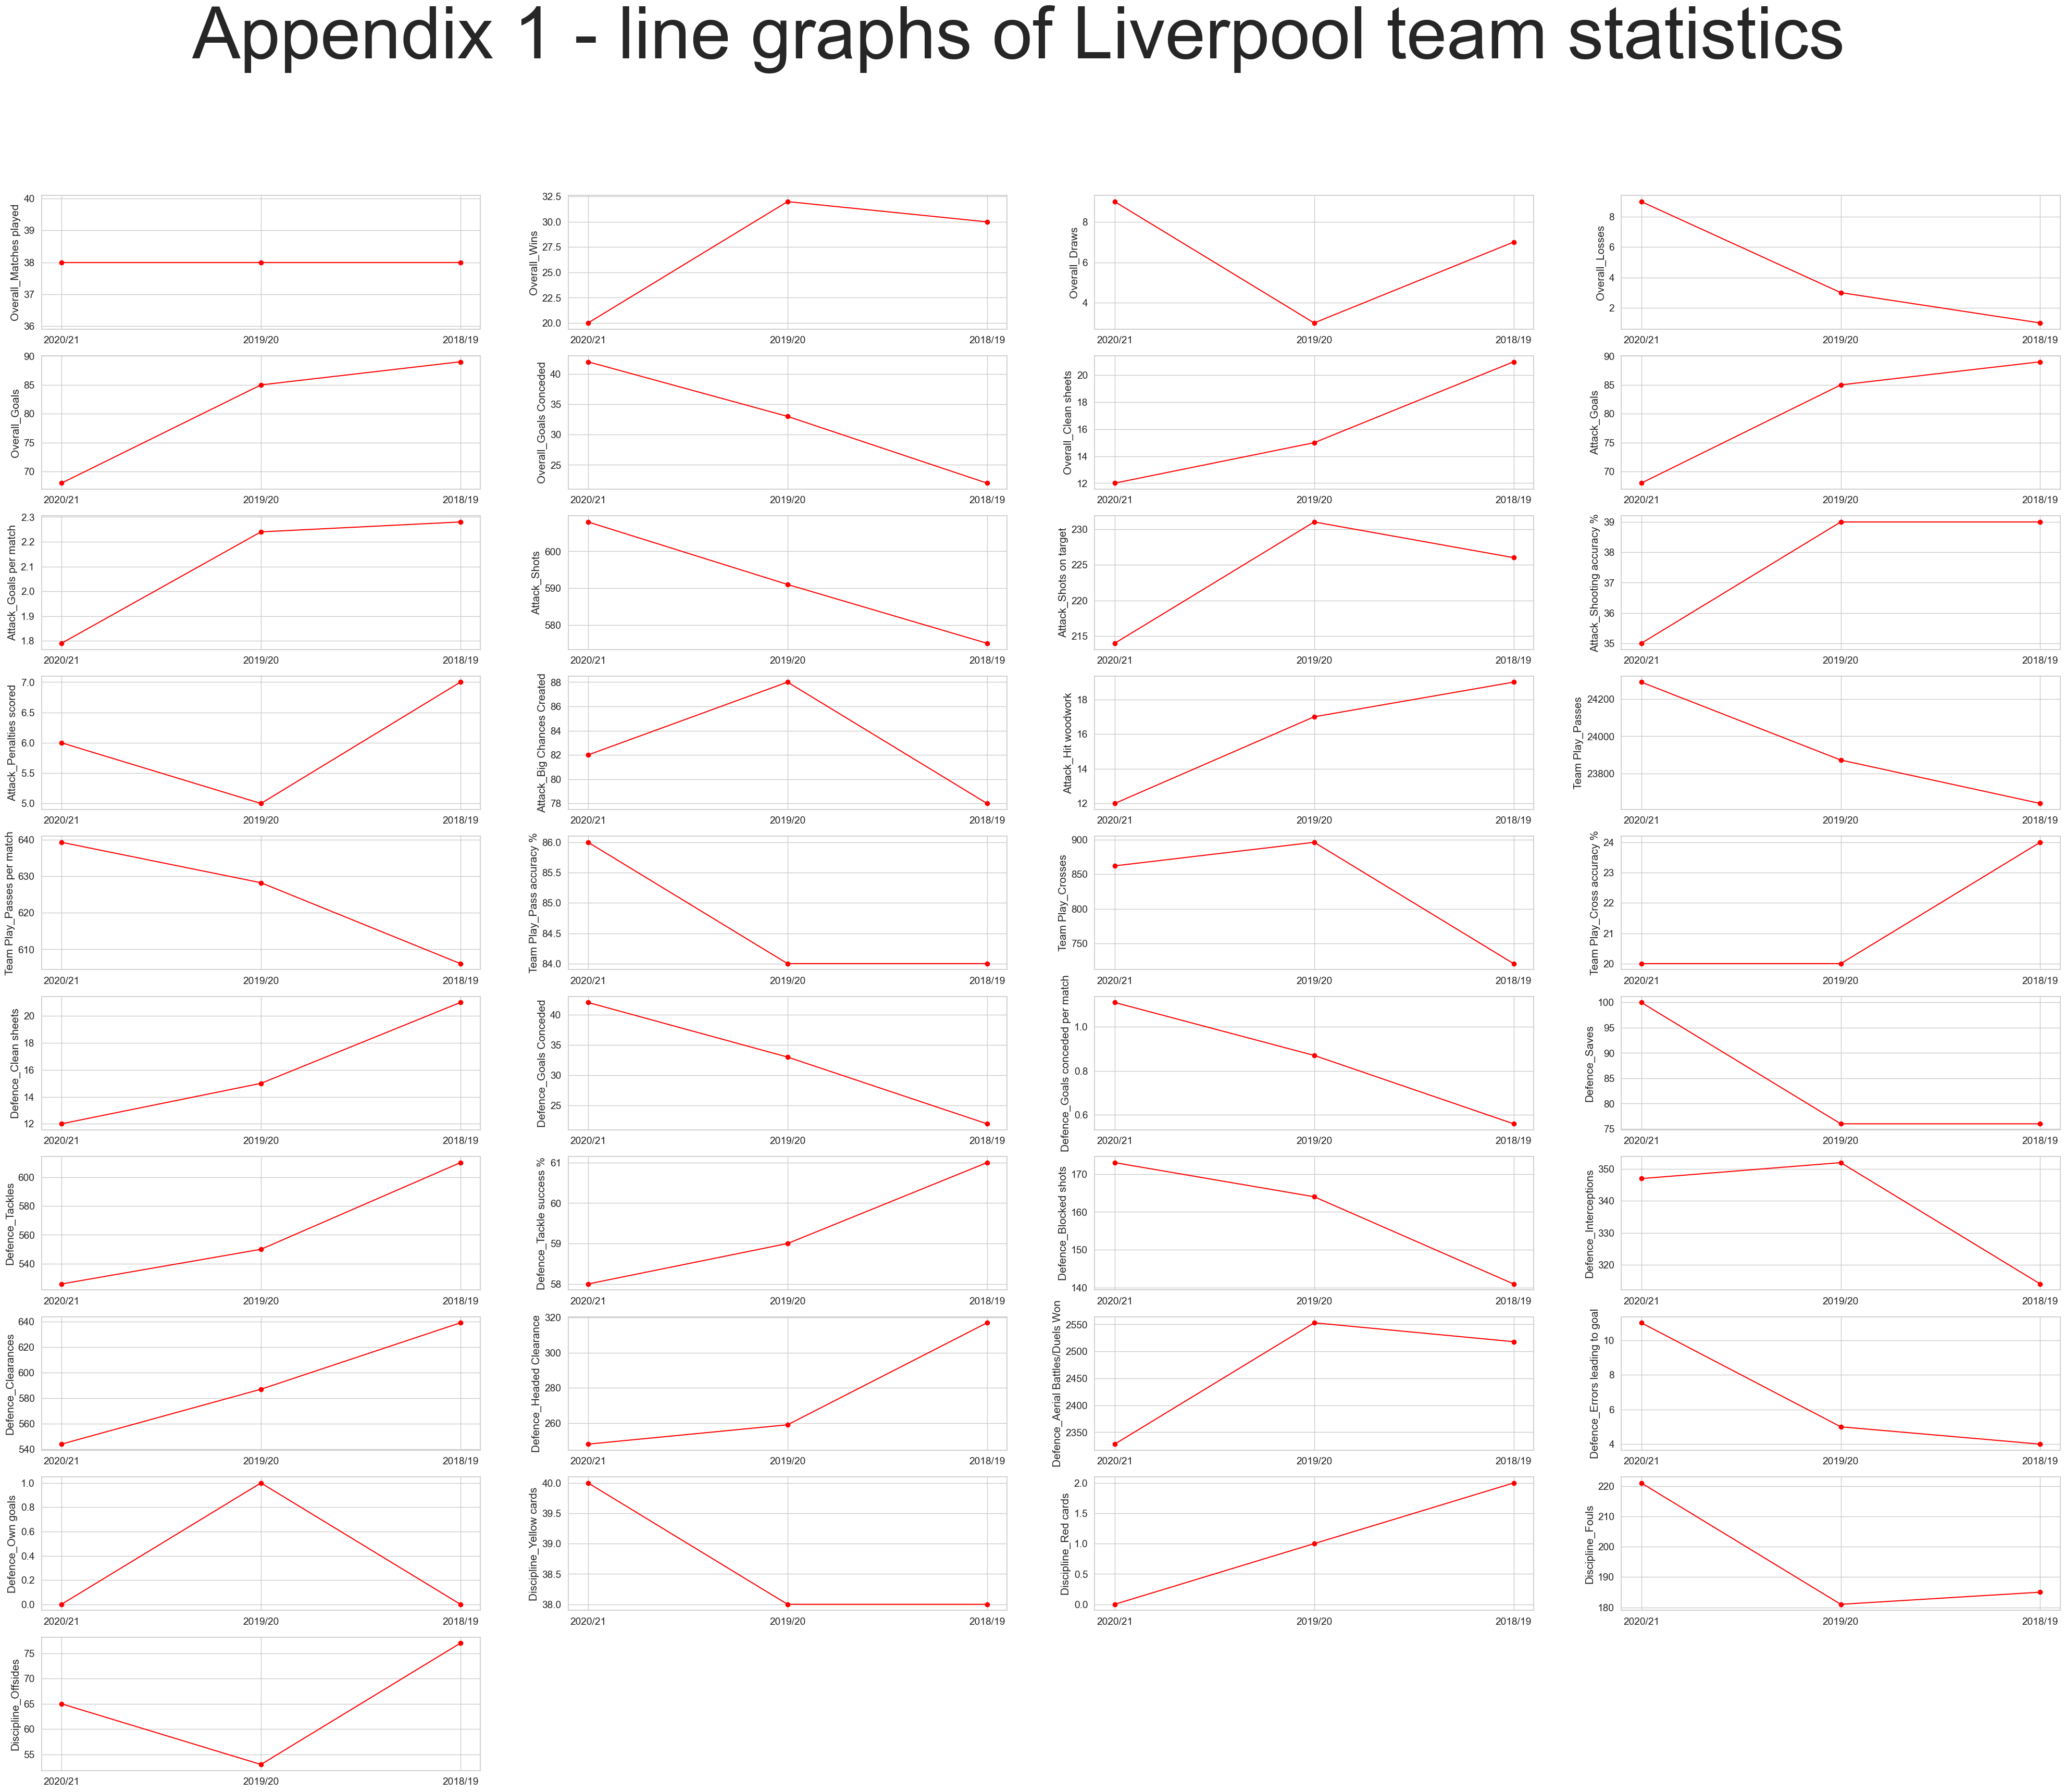

In [78]:
# generating line graphs of Liverpool team statistics
plt.figure(figsize=(50,150))

for i,col in enumerate(team_stats_df.columns.drop('season')):
    plt.subplot(len(team_stats_df.columns.drop('season')),4,i+1)
    plt.plot(team_stats_df.season.unique(), team_stats_df[col],'-o',color='red')
    plt.ylabel(col)
    plt.xticks([],[])
    plt.xticks(team_stats_df.season.unique(), team_stats_df.season.unique(), rotation='horizontal')
    plt.suptitle('Appendix 1 - line graphs of Liverpool team statistics', fontsize = 100, verticalalignment='center').set_position([.5,.9])

plt.show()

In [398]:
# to generate a requirements.txt file
pip freeze >> requirements.txt